# Introduction
<img src="images/1.jpg" width="100%">

Understanding how and why we are here is one of the fundamental questions for the human race. Part of the answer to this question lies in the origins of galaxies, such as our own Milky Way. Yet questions remain about how the Milky Way (or any of the other ~100 billion galaxies in our Universe) was formed and has evolved.

### Data Description
In the dataset, we have information on the demographic and socio-economic situation of 181 galaxies over a period of up to 26 years. There are 80 variables that describe the characteristics of each galaxy. Additionally, there is a composite index that measures the well-being of each galaxy, but it is not clear which demographic and socio-economic variables influence this index. Our goal is to:
1. Use data analysis techniques to determine what factors make these galaxies better off, in terms of their well-being index. 
2. By identifying which variables have the strongest correlation with the well-being index:
    - we can gain insights into the underlying factors that contribute to the overall well-being of these galaxies.




In [235]:
#import packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Package for graphical analysis of missingvalues
import missingno as msno
%matplotlib inline

# ignore future warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_text
import pickle




### 1. Loading and Examining the data 
We get to look at the variable names and data types in order to understand the structure of the data.

The below function will be used to load files from the data sets

In [236]:
def load_dataset(file_path):
    """
    Loads a dataset from a file path using pandas library
    
    Parameters:
    -----------
    file_path : str
        The path to the dataset file

    Returns:
    --------
    pandas.DataFrame
        The loaded dataset as a pandas dataframe
    """
    try:
        # Set the max_columns parameter to None
        pd.set_option('display.max_columns', None)
        dataset = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {file_path}")
        return dataset
    except Exception as e:
        print(f"Error loading dataset from {file_path}: {str(e)}")


In [237]:
# import both the train and the validation files
train_data = load_dataset("datasets/Train_data.csv")
test_data = load_dataset("datasets/Validation.csv")

#display the first five rows of the train set
train_data.head()

Dataset loaded successfully from datasets/Train_data.csv
Dataset loaded successfully from datasets/Validation.csv


ID  galactic year                       galaxy   
0  10065        1002001                     Antlia B  \
1  10087         999000  KKH 11 (ZOAG G135.74-04.53)   
2  10141         993012                 Leo IV Dwarf   
3  10168         995006                      NGC 185   
4  10201         996004                       Grus I   

   existence expectancy index  existence expectancy at birth   
0                    0.624015                      56.397241  \
1                    0.970048                      80.924094   
2                    0.995540                      82.441006   
3                    1.004362                      75.635986   
4                    1.050627                      83.412540   

   Gross income per capita  Income Index   
0              17649.87156      0.458599  \
1              11409.94296      0.757218   
2              58774.29343      1.032429   
3              34960.41911      0.707776   
4              17073.45121      0.951402   

   Expected years of education (galactic years)   
0                                      7.857841  \
1                                     15.869798   
2                                     17.545117   
3                                     13.578086   
4                                     13.518157   

   Mean years of education (galactic years)   
0                                  5.196527  \
1                                 13.065734   
2                                 11.399711   
3                                       NaN   
4                                 11.749071   

   Intergalactic Development Index (IDI)  Education Index   
0                               0.507534         0.471400  \
1                               0.807108         0.837559   
2                               0.973684         0.890396   
3                                    NaN              NaN   
4                               0.965452         0.798000   

   Intergalactic Development Index (IDI), Rank   
0                                   247.196654  \
1                                   137.299057   
2                                    74.709302   
3                                          NaN   
4                                   141.210462   

   Population using at least basic drinking-water services (%)   
0                                          33.135967            \
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Population using at least basic sanitation services (%)   
0                                          58.079357        \
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Gross capital formation (% of GGP)  Population, total (millions)   
0                                 NaN                           NaN  \
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                            9.558559                    700.239666   
4                                 NaN                           NaN   

   Population, urban (%)  Mortality rate, under-five (per 1,000 live births)   
0                    NaN                                                NaN   \
1                    NaN                                                NaN    
2                    NaN                                                NaN    
3              51.742205                                          62.363792    
4                    NaN                                                NaN    

   Mortality rate, infant (per 1,000 live births)   
0                             

In [238]:
def explore_dataframe(df):
    """
    This function explores the data structure of a pandas dataframe
    using various methods including df.info(), df.describe(), 
    df.nunique(), df.duplicated(), and df.isnull().sum().
    
    Args:
    df (pandas.DataFrame): The dataframe to be explored.
    
    Returns:
    None.
    """
    print("DataFrame Information:\n")
    df.info()
    
    print("\n\nDataFrame Description:\n")
    print(df.describe().T)
    
    print("\n\nUnique Values:\n")
    for col in df.columns:
        if df[col].nunique() < 10:
            print(col, ":", df[col].unique())
    
    print("\n\nDuplicated Rows:\n")
    print(df[df.duplicated()])
    
    print("\n\nMissing Values:\n")
    print(df.isnull().sum())

# display the information, statistical description and number of missing values for our train set
train_data_structure = explore_dataframe(train_data)

DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita               

In [239]:
# display the structure of test set
test_data_structure = explore_dataframe(test_data)

DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       720 non-null    int64  
 1   galactic year                                                                            720 non-null    int64  
 2   galaxy                                                                                   720 non-null    object 
 3   existence expectancy index                                                               720 non-null    float64
 4   existence expectancy at birth                                                            720 non-null    float64
 5   Gross income per capita                 

### 2. Handling Missing Values
After briefly looking through the data, notice that some entries are missing in both data sets.

We will determine the number of missing entries for a specified column in the dataset. We will also plot a bar graph and a matrix plot to visualize it

In [240]:
def total_missing(df,column_name):
    missing = df[column_name].isnull().sum()
    return column_name +" has " + str(missing)+" missing values"

# how many issing values for the column: Population, urban (%) 
print(total_missing(train_data,'Population, urban (%)'))
print(total_missing(test_data,'Population, urban (%)'))

Population, urban (%) has 2404 missing values
Population, urban (%) has 150 missing values


The column `Population, urban (%)` has more than half the data missing in our train data set. **How do we handle such a case**
Just to have a sneak peak of all columns with missing values, we can aslo visualize them.

In [241]:
def plot_missing_data(df):
    # Create matrix plot
    msno.matrix(df)
    plt.show()
    
    # Create bar plot
    msno.bar(df)
    plt.show()

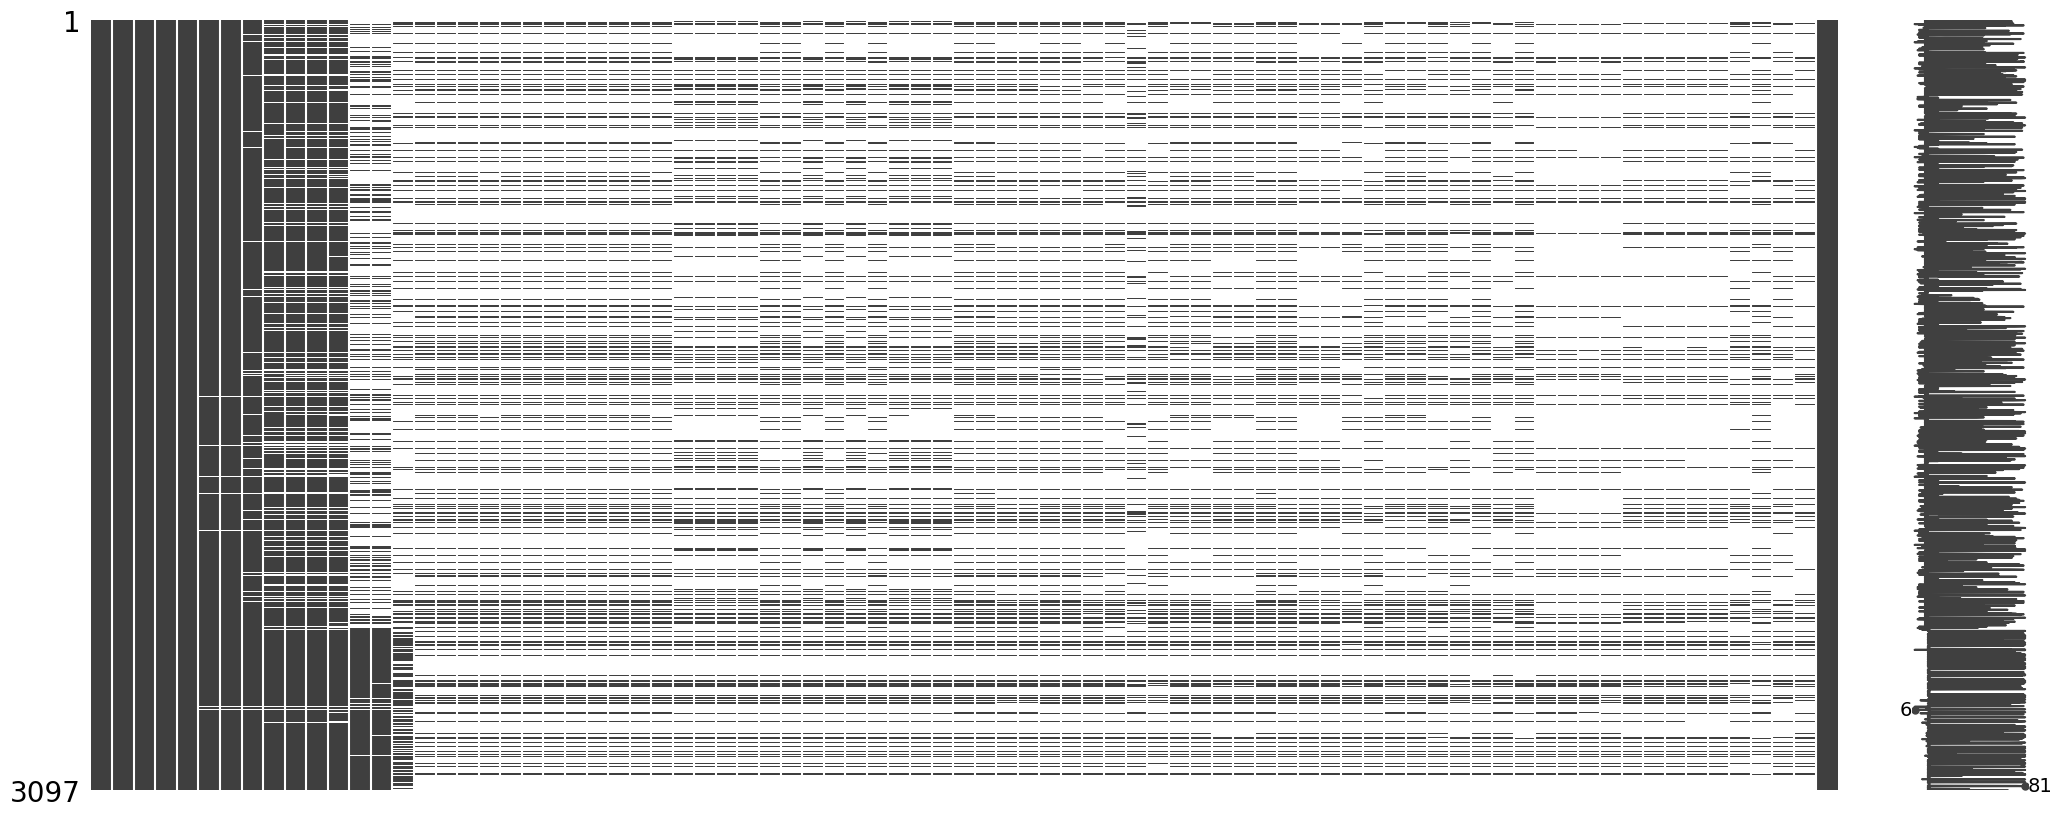

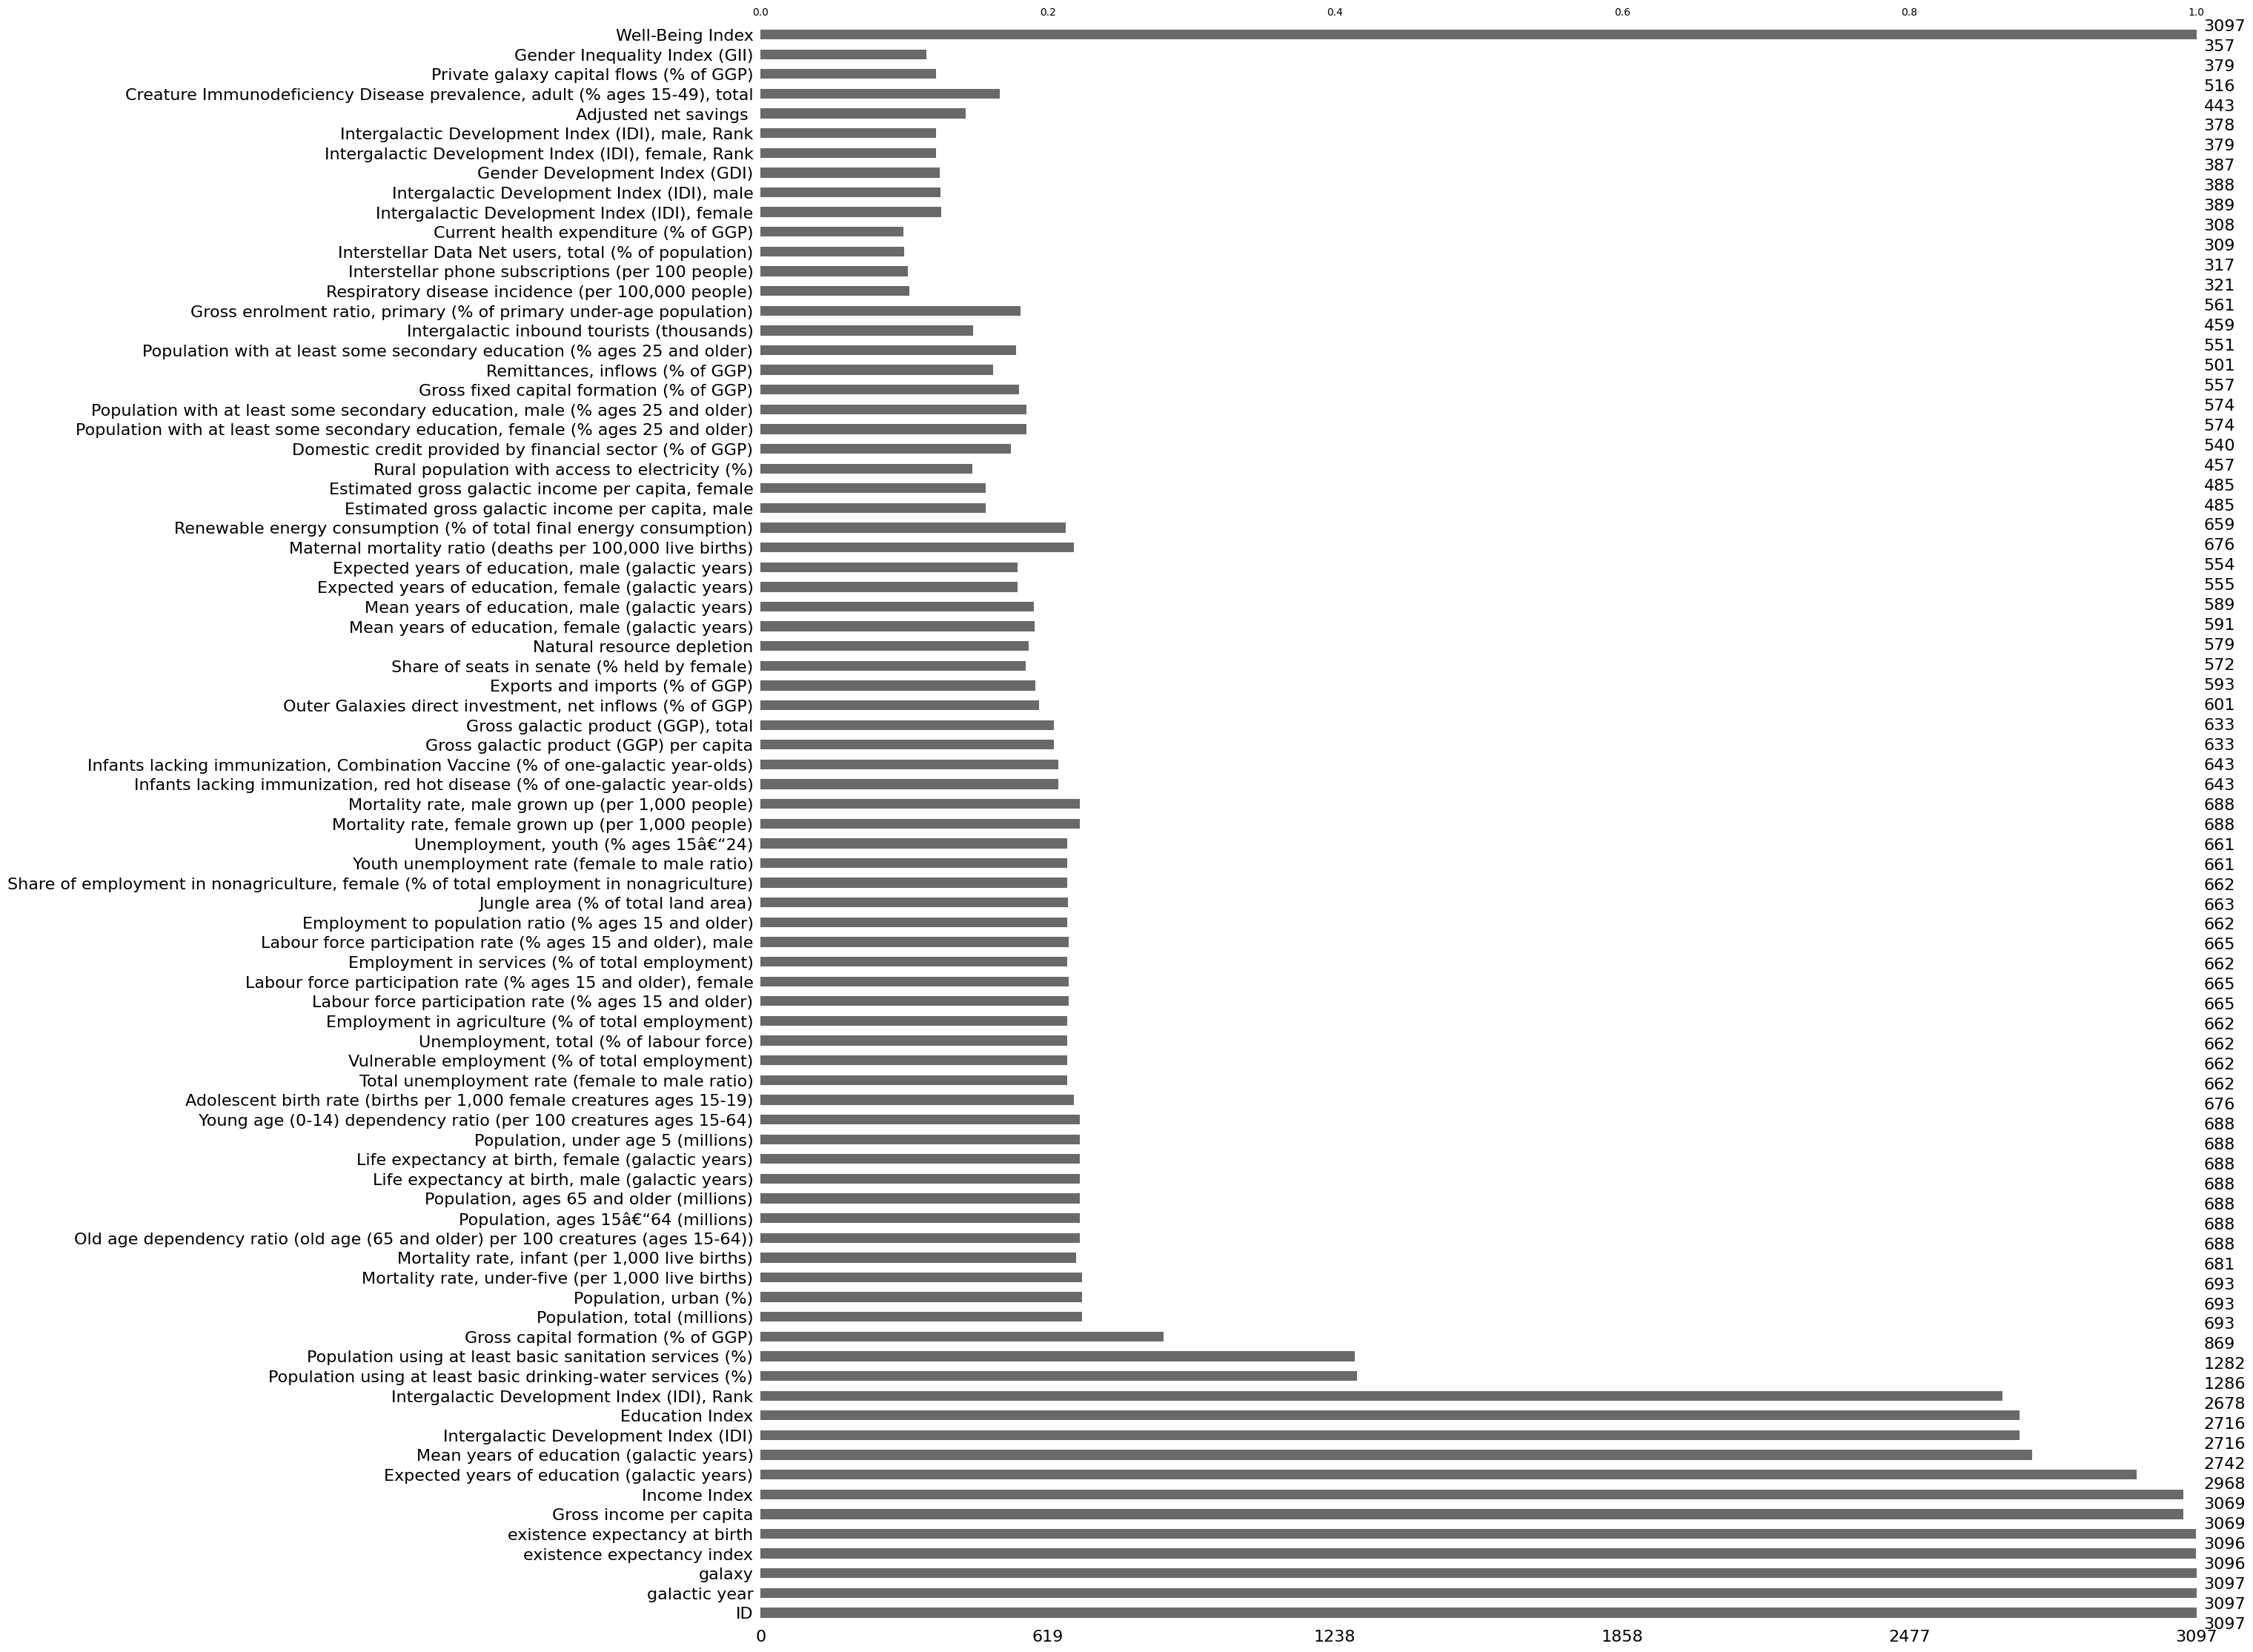

In [242]:
plot_missing_data(train_data)

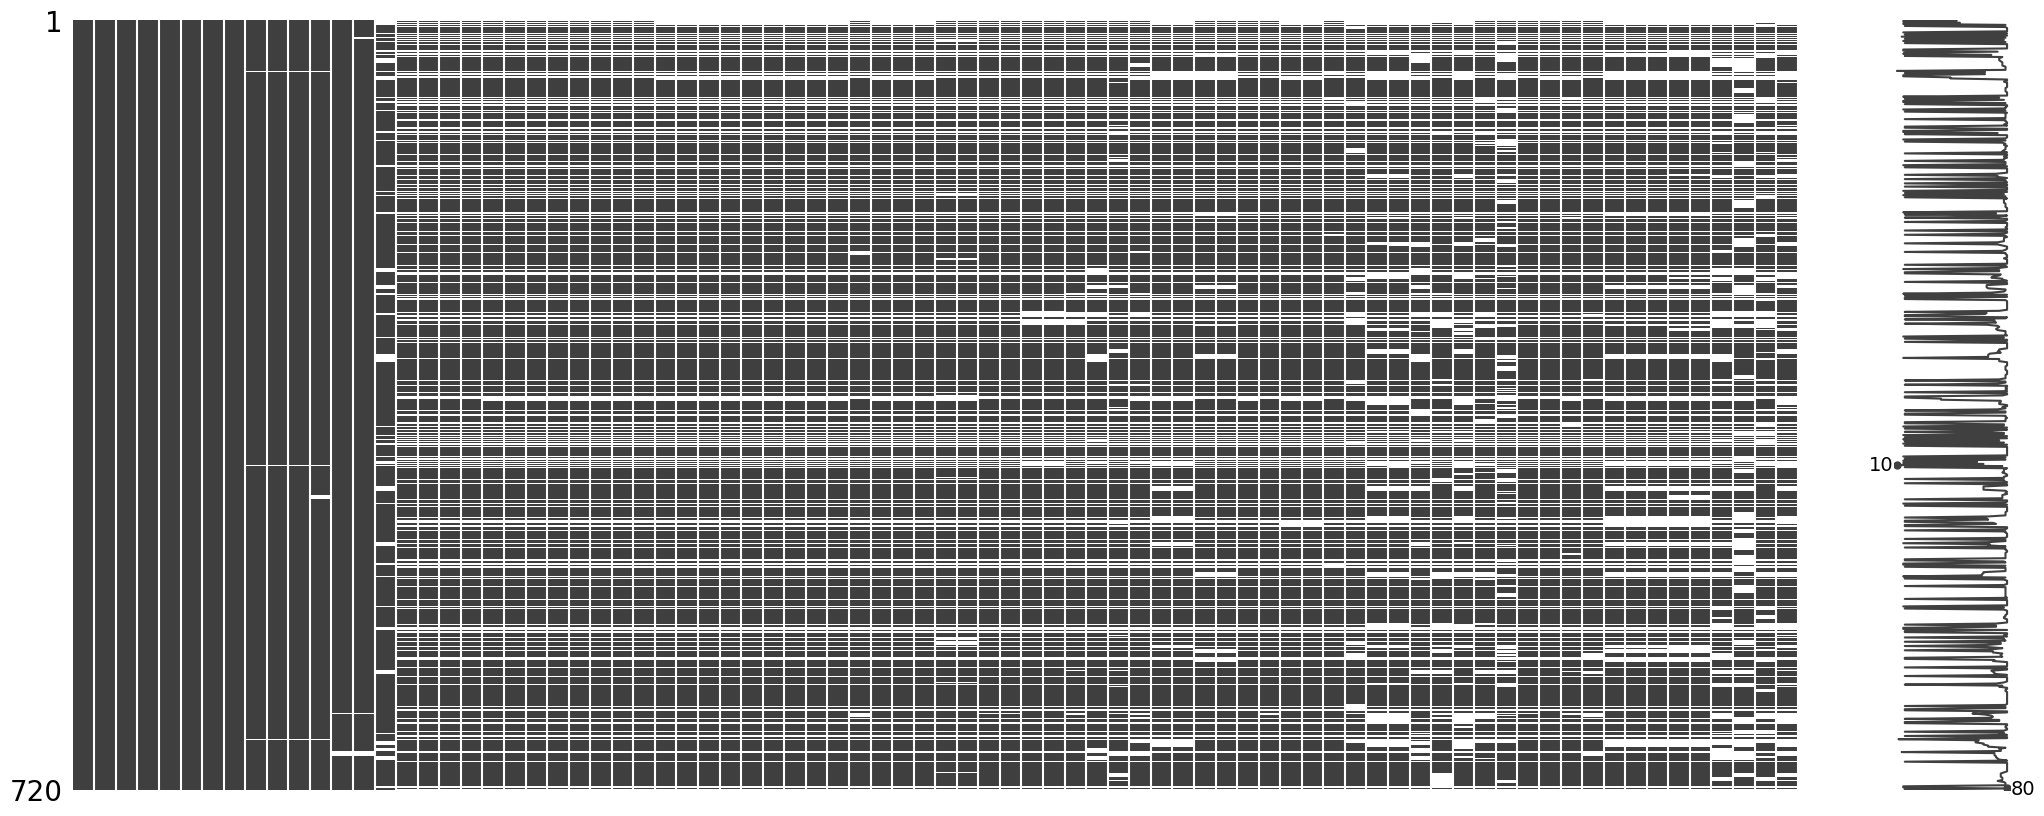

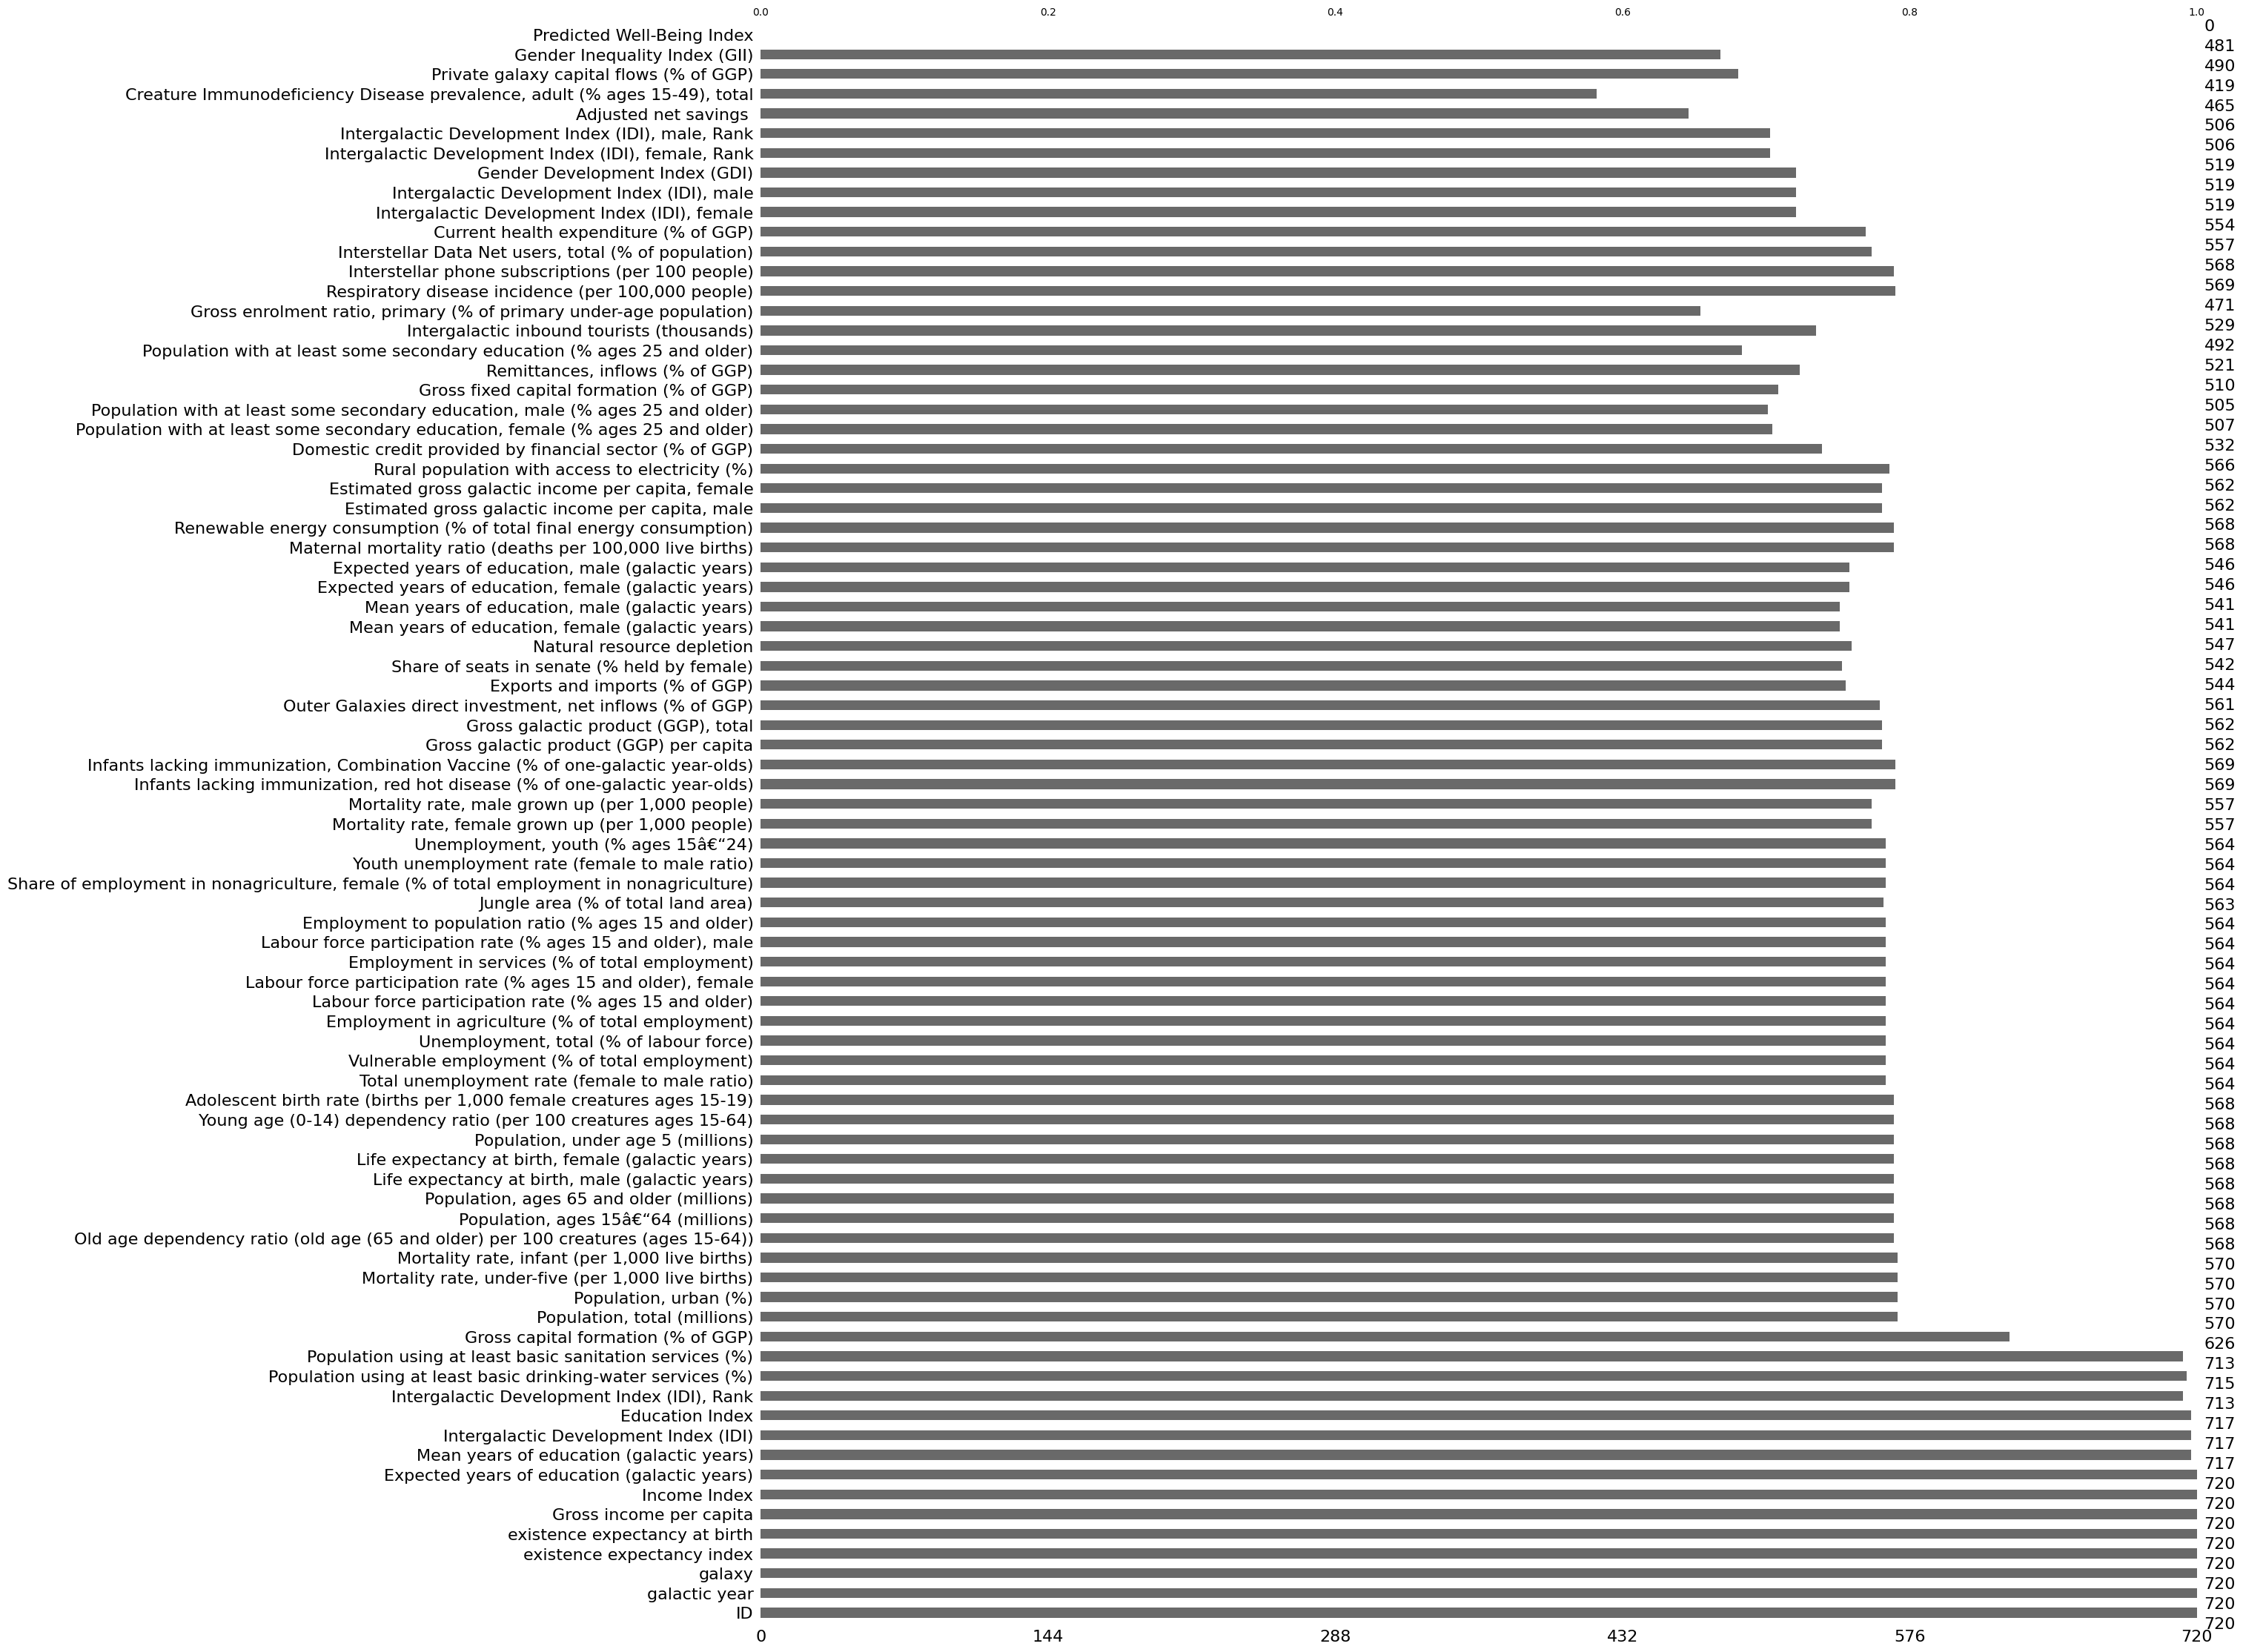

In [243]:

plot_missing_data(test_data)

From the above visualizations it is worth noting how the missing values occur: **missing at random**
It is observed that most of the columns on the train data have more than half of the records missing. In such a case, we drop the columns using a given threshold.

It would be a good idea to replace some of the missing data. Missing values can be replaced with the either the mean , the median or the mode (in the case of categorical columns). However, based on the data we have columns that have extremely high percentage of missing values(more than half of the records). I might drop sme of the columns to avoid bias when training our set for predictions

In [244]:
def drop_missing_columns(df, n):
    """
    Drops columns with too many missing values from a DataFrame and prints
    the resulting information about the DataFrame.
    
    Arguments:
    train_data -- pandas DataFrame
    
    Returns:
    None
    """
    # Compute the threshold for dropping columns
    threshold = df.shape[0] - n
    
    # Drop columns with too many missing values
    df.dropna(axis=1, thresh=threshold, inplace=True)
    
    # Print the information about the resulting DataFrame
    print(df.info())

 


We will define a threshold `n=1000` on our train set. Then we will drop columns not in train set for our test set 

In [245]:
#copy the given set
train_df = train_data.copy() 
drop_missing_columns(train_df,1000)  
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3097 non-null   int64  
 1   galactic year                                 3097 non-null   int64  
 2   galaxy                                        3097 non-null   object 
 3   existence expectancy index                    3096 non-null   float64
 4   existence expectancy at birth                 3096 non-null   float64
 5   Gross income per capita                       3069 non-null   float64
 6   Income Index                                  3069 non-null   float64
 7   Expected years of education (galactic years)  2968 non-null   float64
 8   Mean years of education (galactic years)      2742 non-null   float64
 9   Intergalactic Development Index (IDI)         2716 non-null   f

Now we only remain with 13 columns with one being a category column

In [246]:
test_df = test_data.copy()
# drop columns in test set not in train set
cols_to_drop = set(test_df.columns) - set(train_df.columns)
test_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            720 non-null    int64  
 1   galactic year                                 720 non-null    int64  
 2   galaxy                                        720 non-null    object 
 3   existence expectancy index                    720 non-null    float64
 4   existence expectancy at birth                 720 non-null    float64
 5   Gross income per capita                       720 non-null    float64
 6   Income Index                                  720 non-null    float64
 7   Expected years of education (galactic years)  720 non-null    float64
 8   Mean years of education (galactic years)      717 non-null    float64
 9   Intergalactic Development Index (IDI)         717 non-null    flo

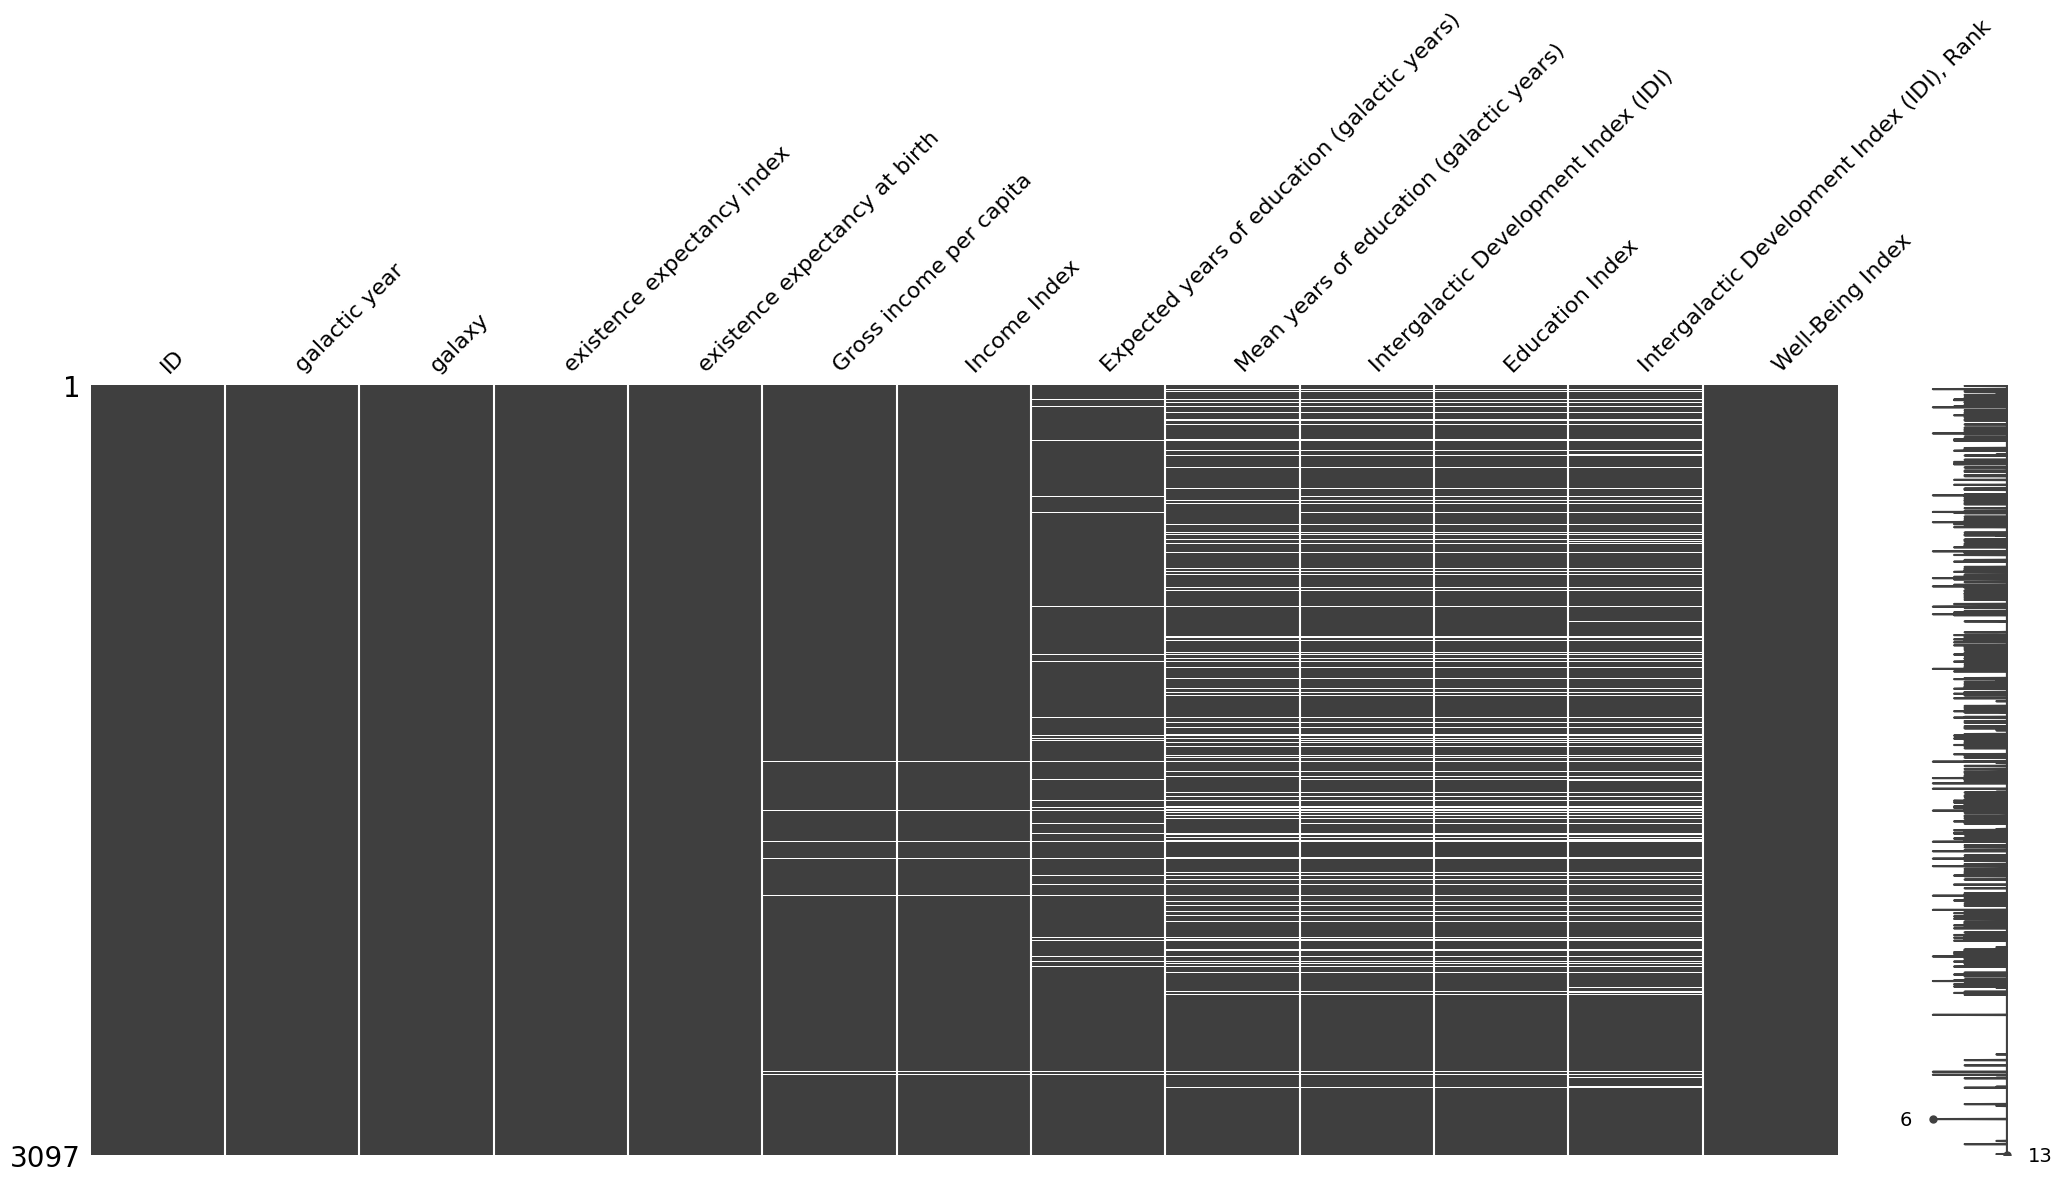

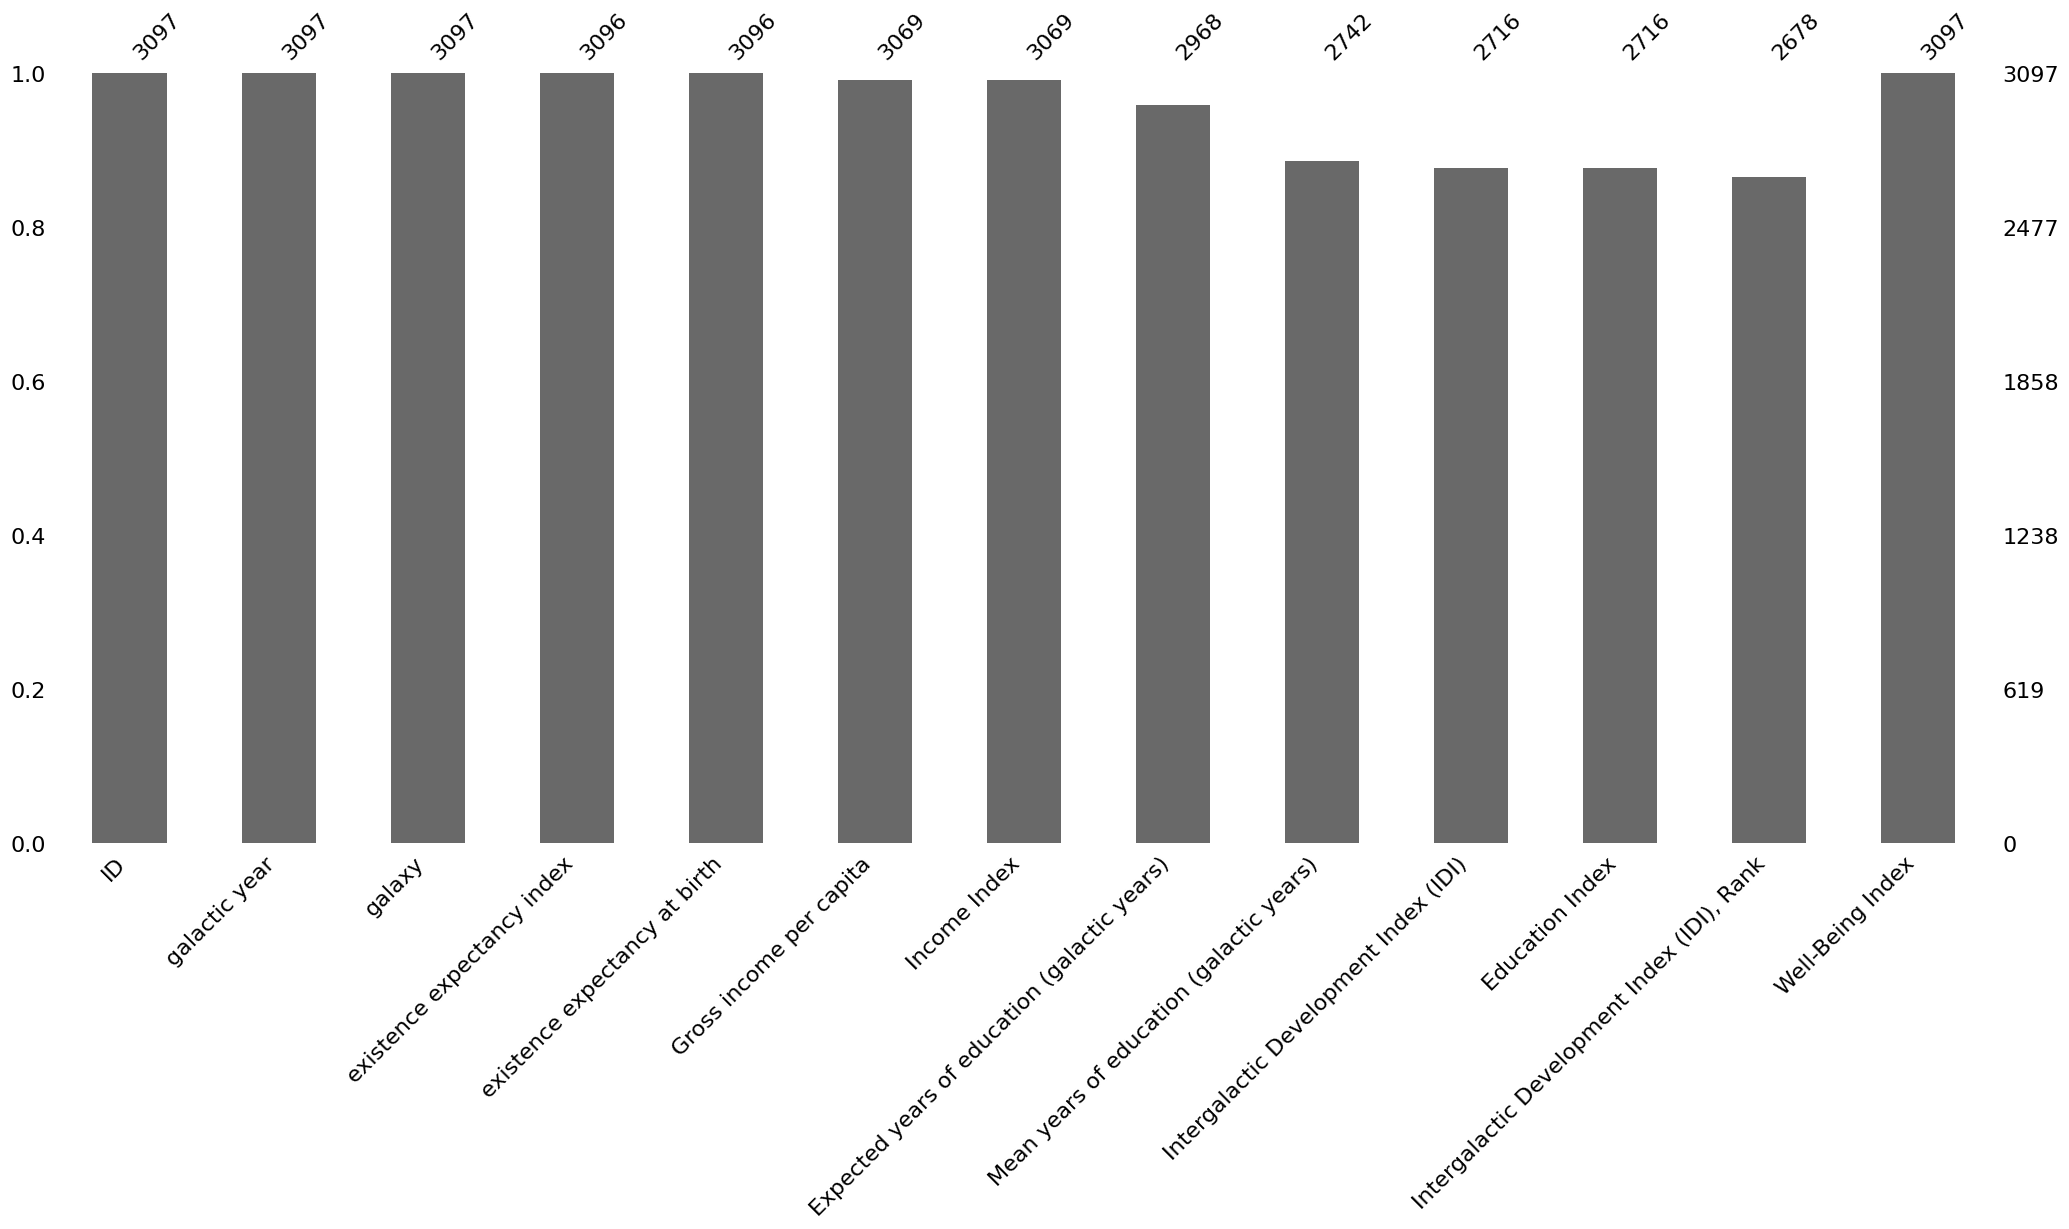

In [247]:
#plot to check the distribution of missing values
plot_missing_data(train_df)

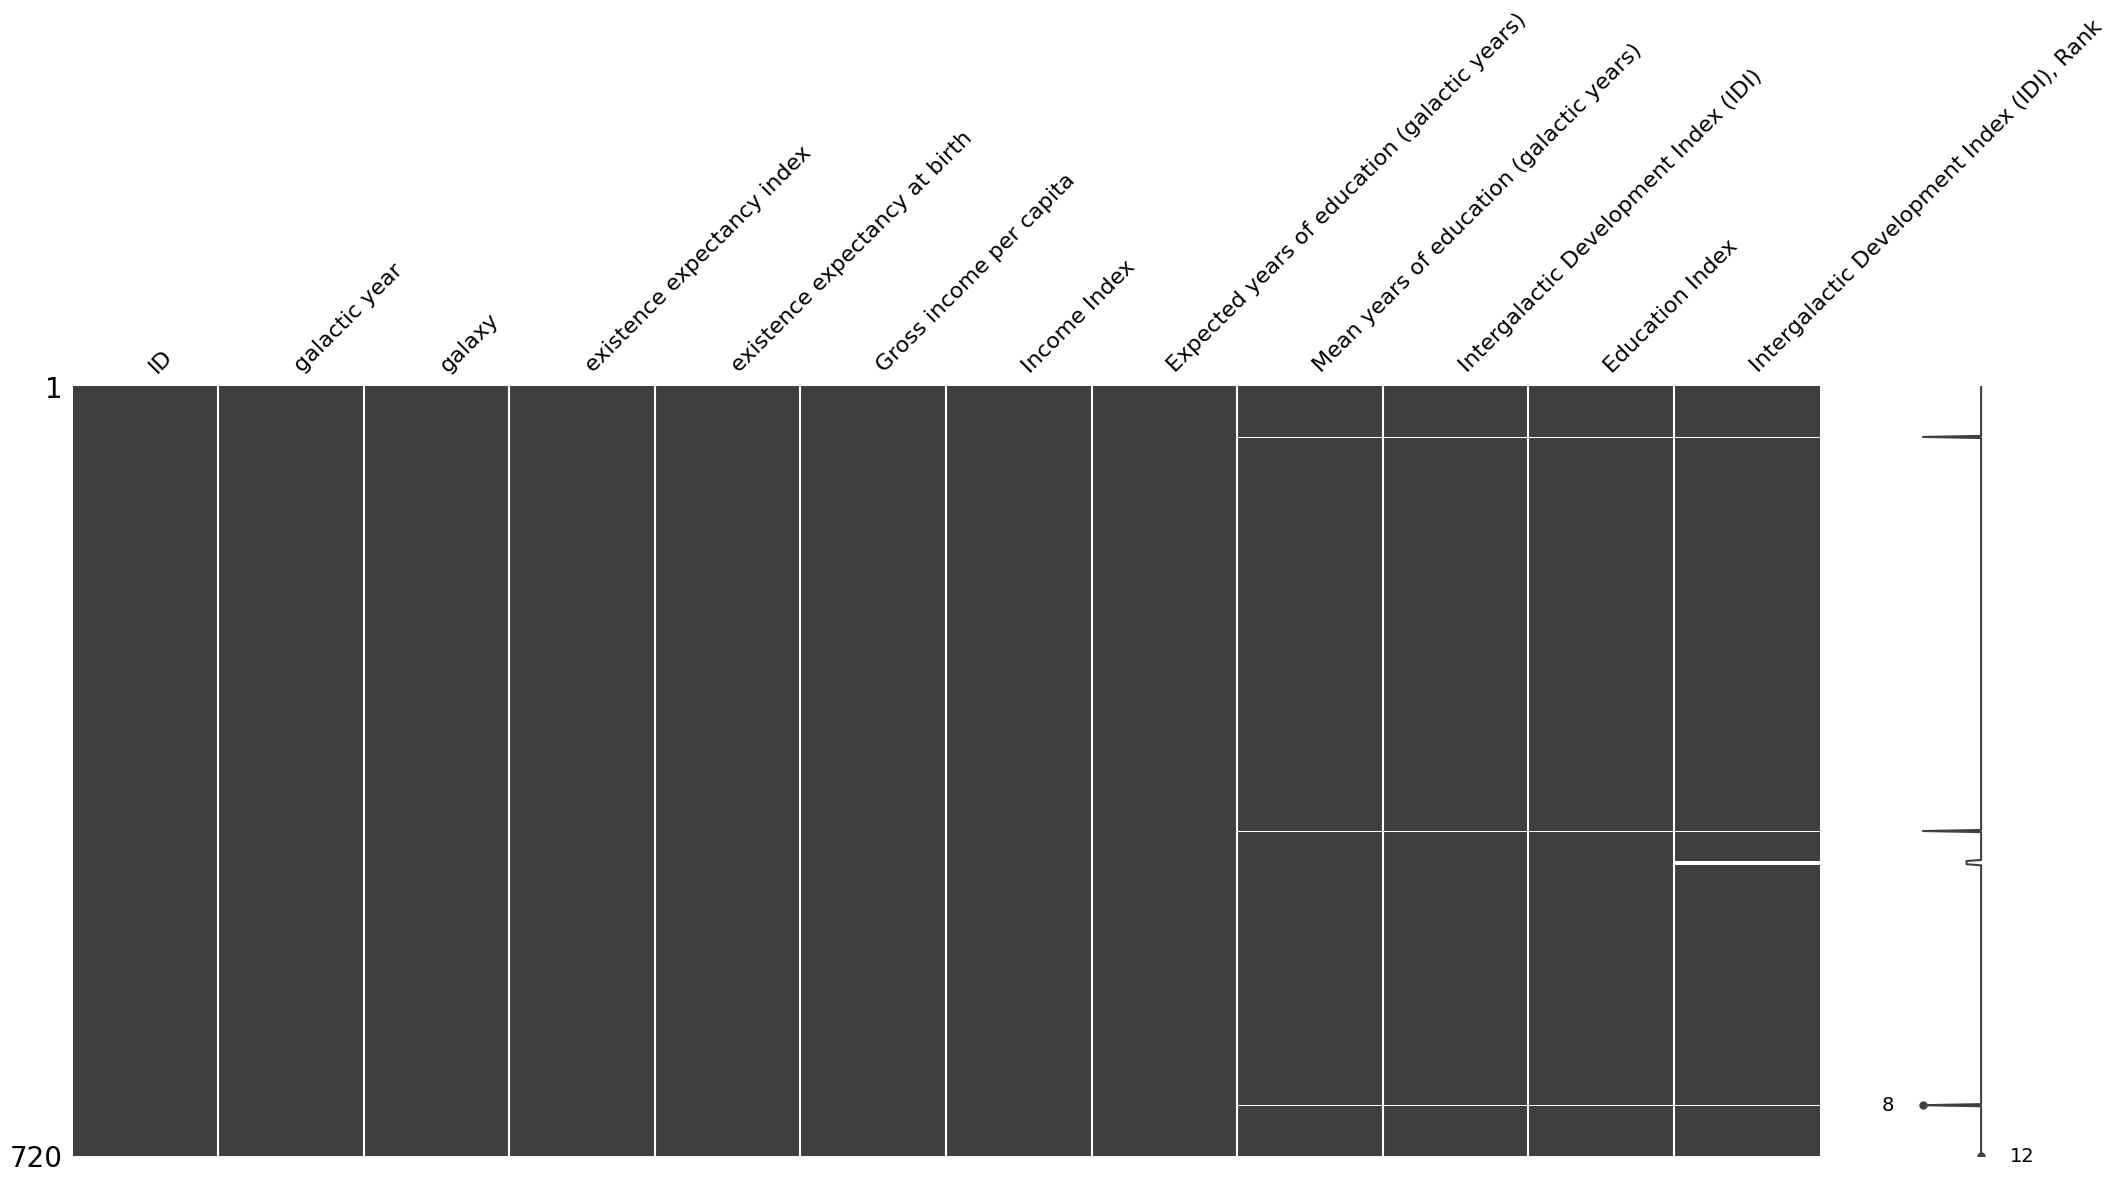

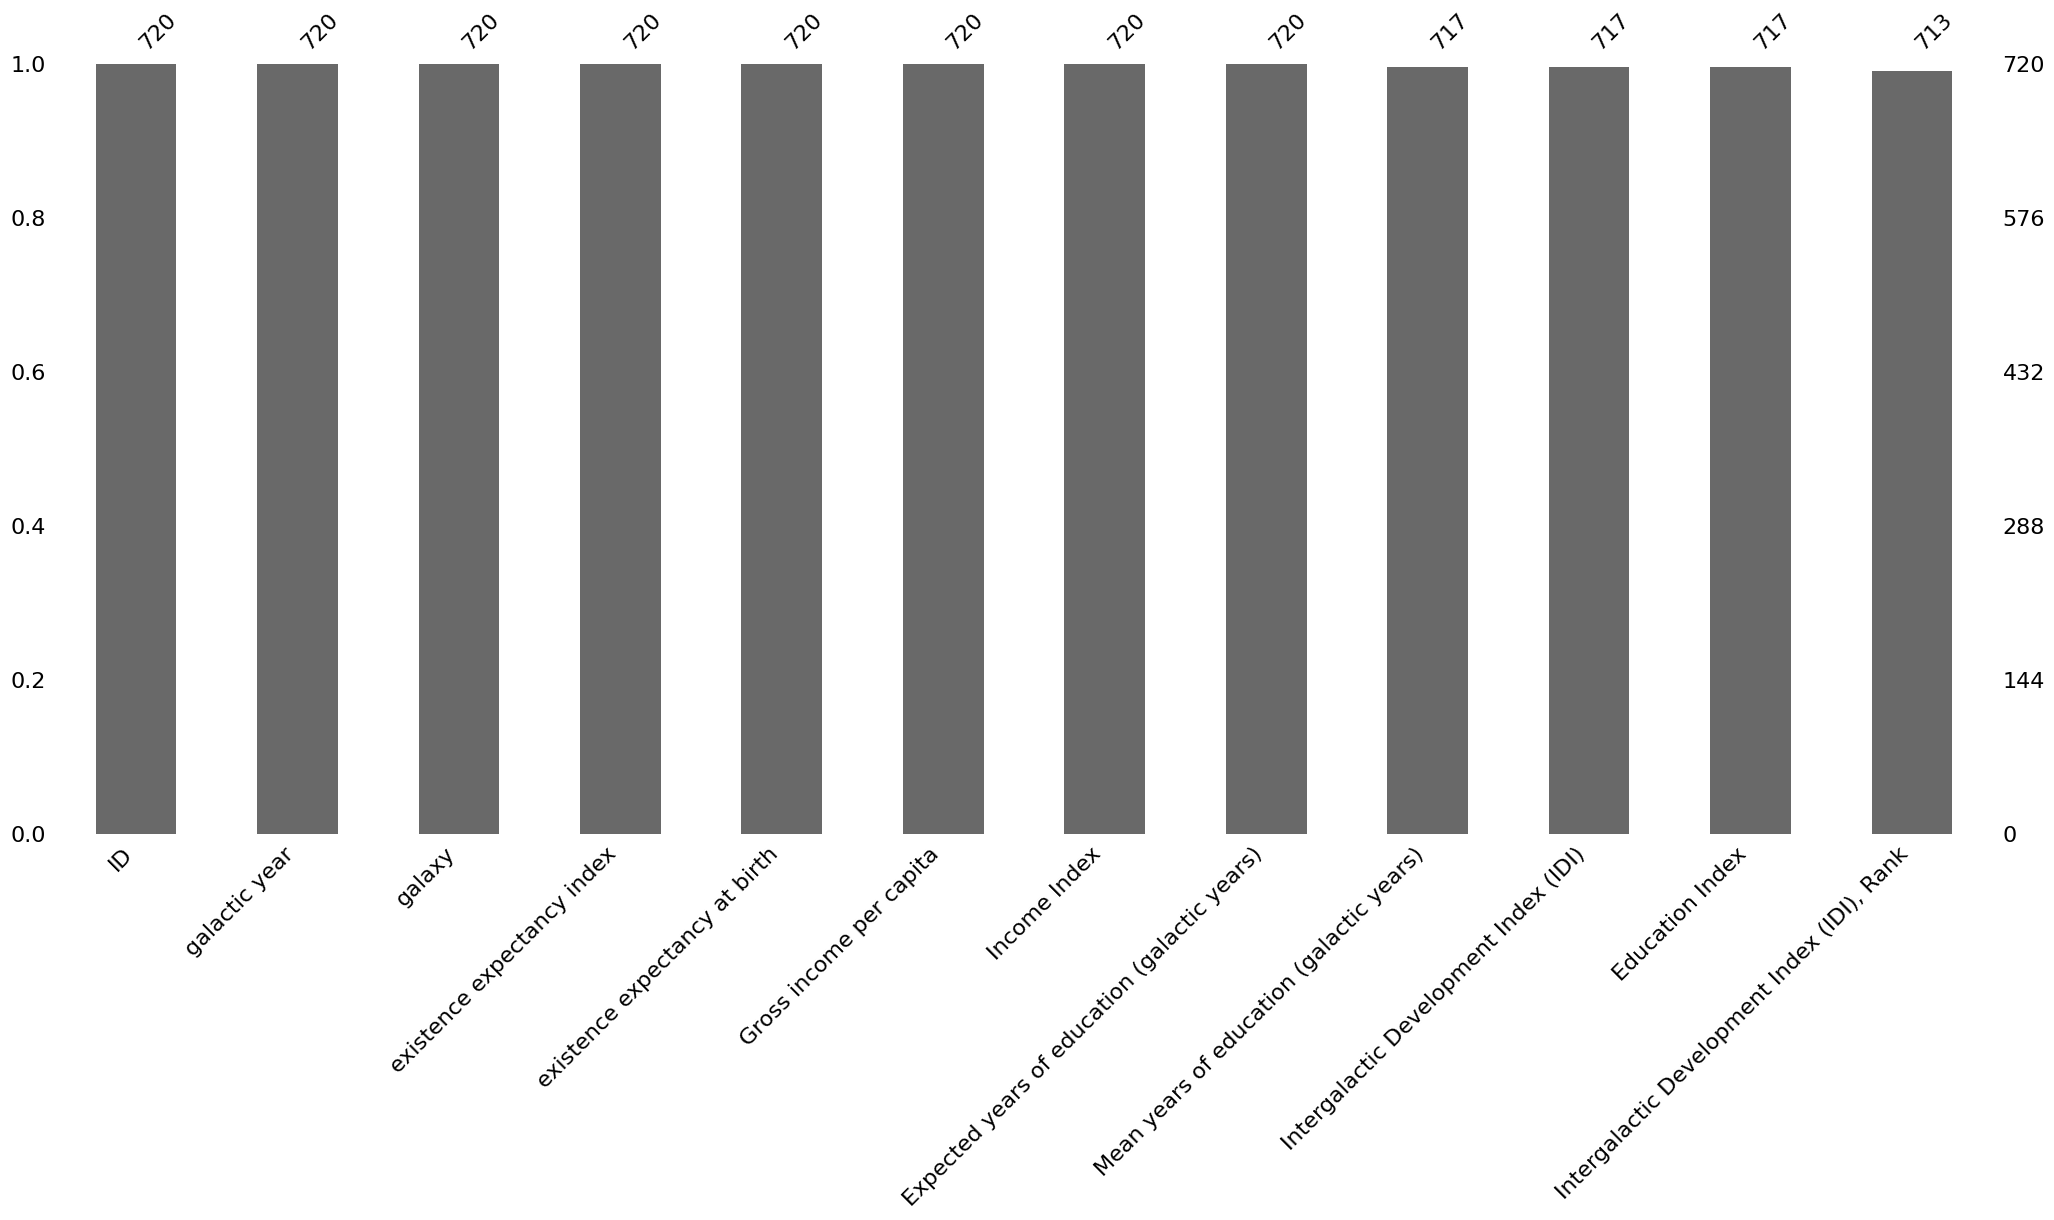

In [248]:
plot_missing_data(test_df)

Our data sets are now ready. But we still have missing values. `Well-Being Index` being our `target` variable, we wil check for its distribution and determine the method that will best suit the imputation for our missing values. 

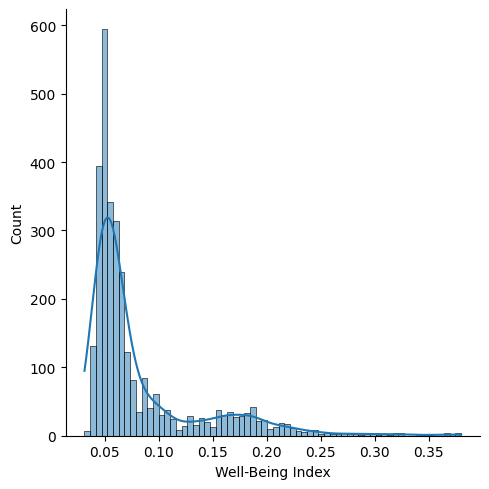

In [249]:
#we use the displot function
sns.displot(data=train_df, x='Well-Being Index', kde=True)

Our `target variable` is highly skewed to the right. Median works well for a skewed data since it is not sensitive to outliers. Even though the below function can be given different parameters for imputation, we will work with the *median* to replace the missing values

In [250]:
def impute_missing_values(df, impute_method):
    '''
    Imputes missing values in a DataFrame using mean, mode, or median for each column.
    
    Parameters:
        df (pandas.DataFrame): DataFrame containing missing values
        impute_method (str): 'mean', 'mode', or 'median'
        
    Returns:
        pandas.DataFrame: DataFrame with imputed values
    '''
    if impute_method not in ['mean', 'mode', 'median']:
        raise ValueError("impute_method must be 'mean', 'mode', or 'median'")
    
    # Make a copy of the DataFrame to avoid modifying the original
    df_imputed = df.copy()
    
    # Loop over columns with missing values and impute based on the specified method
    for col in df_imputed.columns[df_imputed.isnull().any()]:
        if impute_method == 'mean':
            df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)
        elif impute_method == 'mode':
            df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)
        elif impute_method == 'median':
            df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
    
    return df_imputed




In [251]:
clean_df = impute_missing_values(train_df, 'median')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            3097 non-null   int64  
 1   galactic year                                 3097 non-null   int64  
 2   galaxy                                        3097 non-null   object 
 3   existence expectancy index                    3097 non-null   float64
 4   existence expectancy at birth                 3097 non-null   float64
 5   Gross income per capita                       3097 non-null   float64
 6   Income Index                                  3097 non-null   float64
 7   Expected years of education (galactic years)  3097 non-null   float64
 8   Mean years of education (galactic years)      3097 non-null   float64
 9   Intergalactic Development Index (IDI)         3097 non-null   f

In [252]:
clean_df_test = impute_missing_values(test_df, 'median')
clean_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            720 non-null    int64  
 1   galactic year                                 720 non-null    int64  
 2   galaxy                                        720 non-null    object 
 3   existence expectancy index                    720 non-null    float64
 4   existence expectancy at birth                 720 non-null    float64
 5   Gross income per capita                       720 non-null    float64
 6   Income Index                                  720 non-null    float64
 7   Expected years of education (galactic years)  720 non-null    float64
 8   Mean years of education (galactic years)      720 non-null    float64
 9   Intergalactic Development Index (IDI)         720 non-null    flo

### 3. Exploratory Data Analysis
Now that both our datasets are clean we can go ahead and perform some visualizations and descriptive statistics to understand the distribution and range of each variable

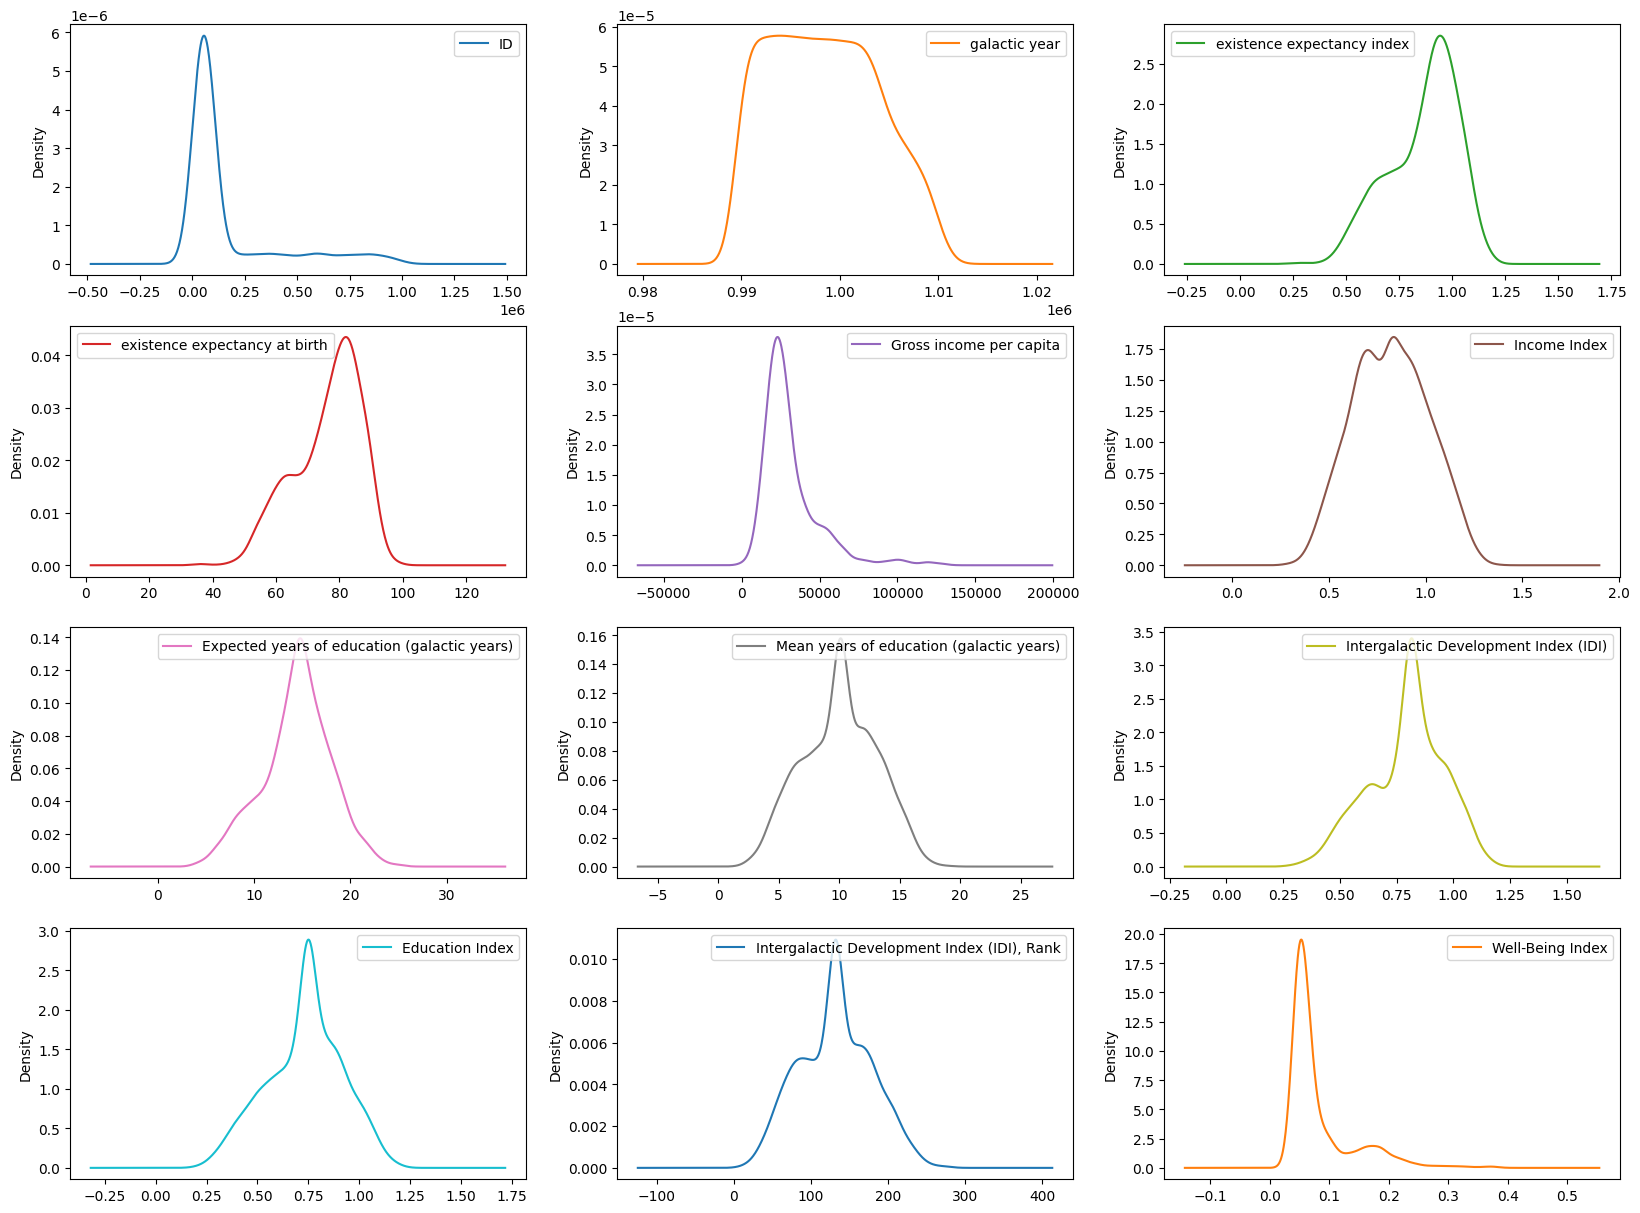

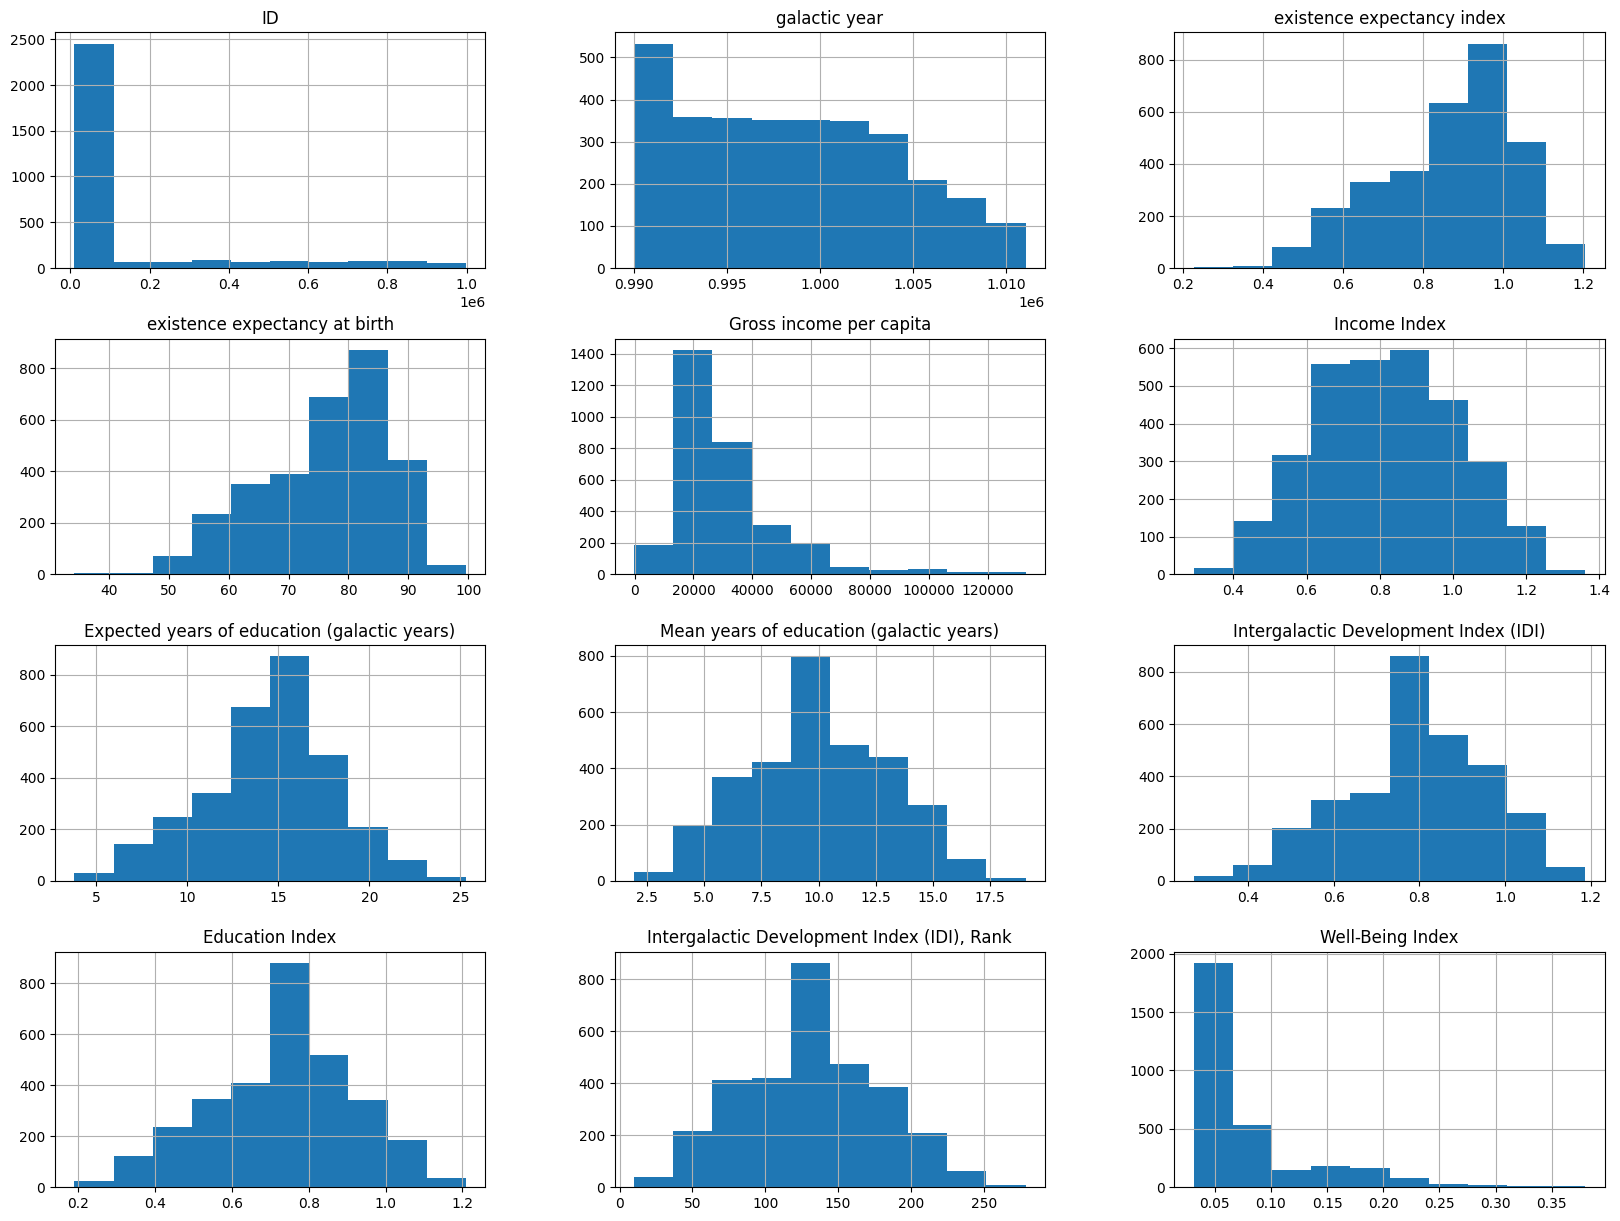

In [253]:
def plot_numeric_histograms(df):
    num_cols = list(df.select_dtypes(include=['float64', 'int64']).columns)
    df[num_cols].plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(20, 15))
    df[num_cols].hist(figsize=(20,15))

plot_numeric_histograms(clean_df)        

A good number of the `predictor variables`(columns that influence the 'target') are normally distributed: `Gross INcome per capita` is slightly skewd to the right

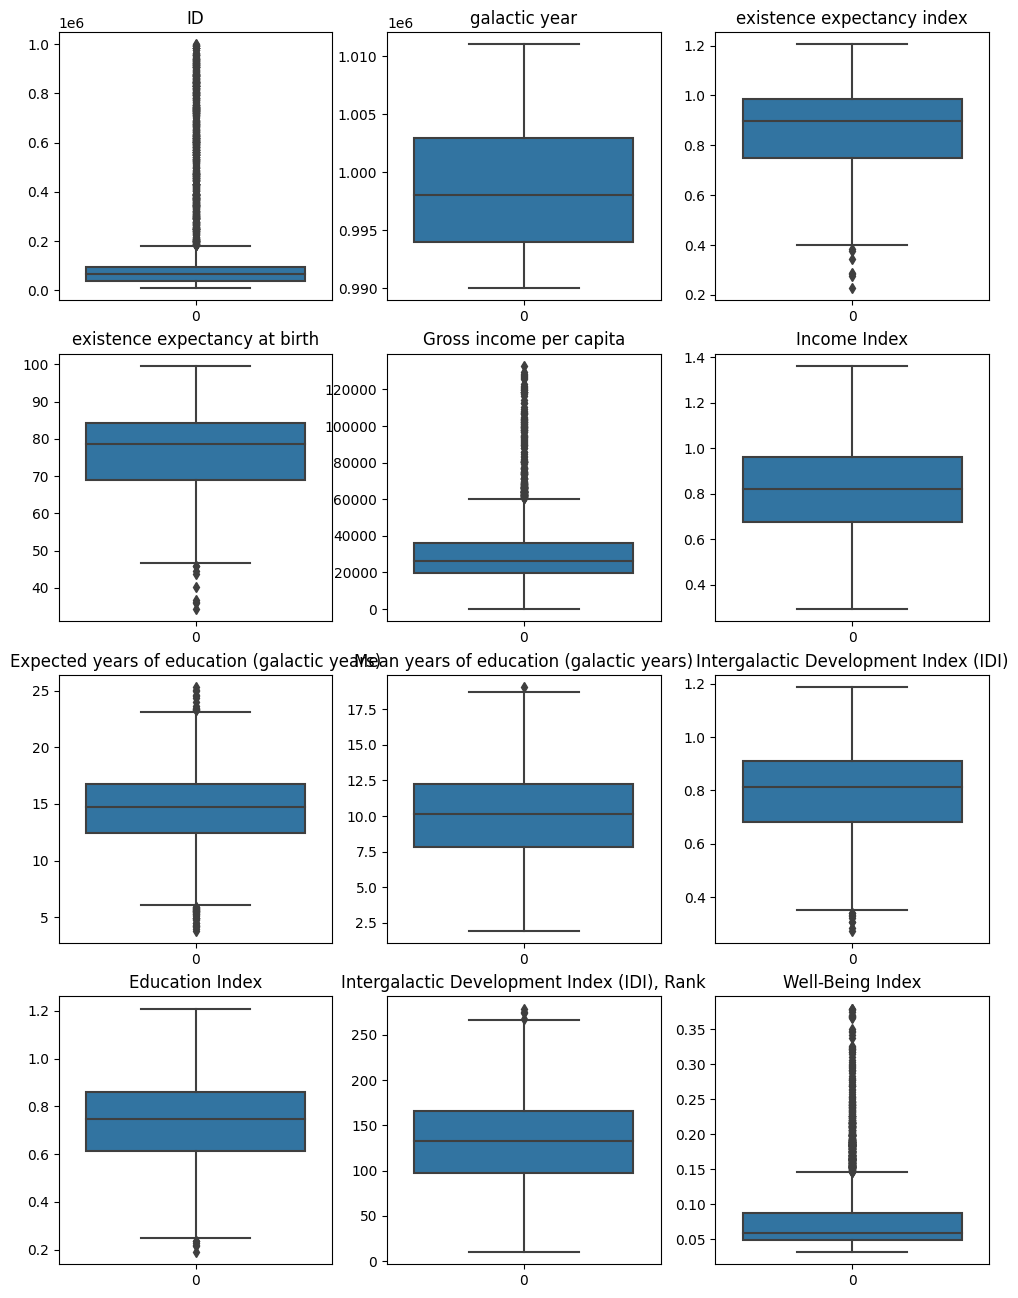

In [254]:
def plot_boxplot(df):
    num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)
    num_col_list = list(df.select_dtypes(include=['float64', 'int64']).columns)
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))
    axs = axs.flatten()
    
    for i, col in enumerate(num_col_list):
        if i < 12: # Only plot the first 12 numerical columns
            sns.boxplot(data=df[col], ax=axs[i])
            axs[i].set_title(col)

    # Remove any unused subplots
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
plot_boxplot(clean_df)        

From the box plot: It is evident that we have extreme values which we call outliers based on the points above and below the wiskers
Moreso, we can use correlation analysis to identify any significant relationships between variables and the well-being index.

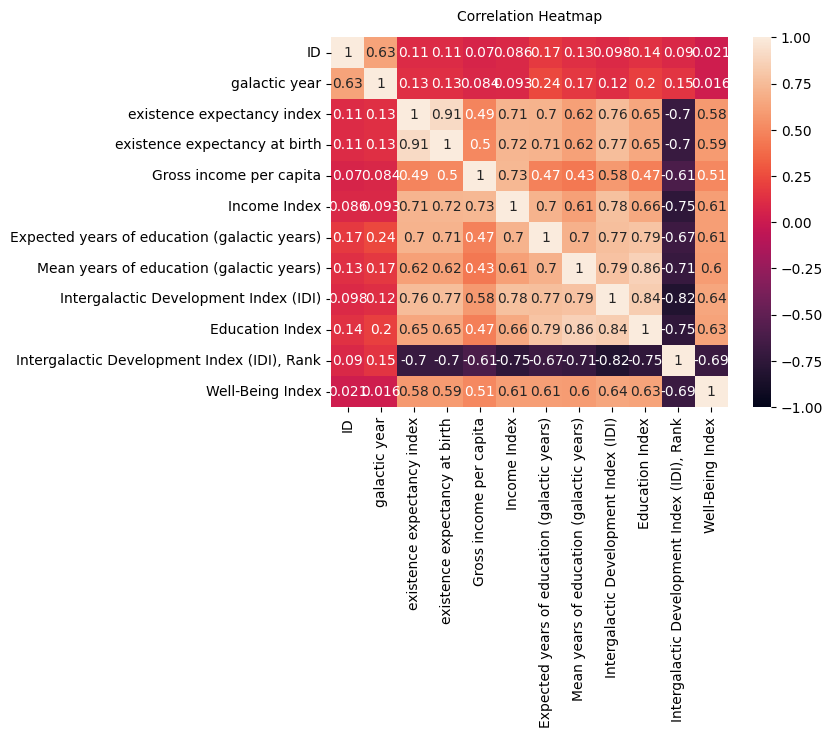

In [255]:
def relationship(df):
    sns.set_style()
    num_col_list = list(df.select_dtypes(include=['float64', 'int64']).columns)
    heatmap = sns.heatmap(df[num_col_list].corr(), vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12)

relationship(clean_df)    

Relationships between our predictor variables is that they are highly corelated either negatively(`existance expectancy at birth` vs `IDI, Rank`) or positively(`existance expectancy index` vs `income index`) **with `-1`  being highly negatively correlation and `+1` being highly positively correlation

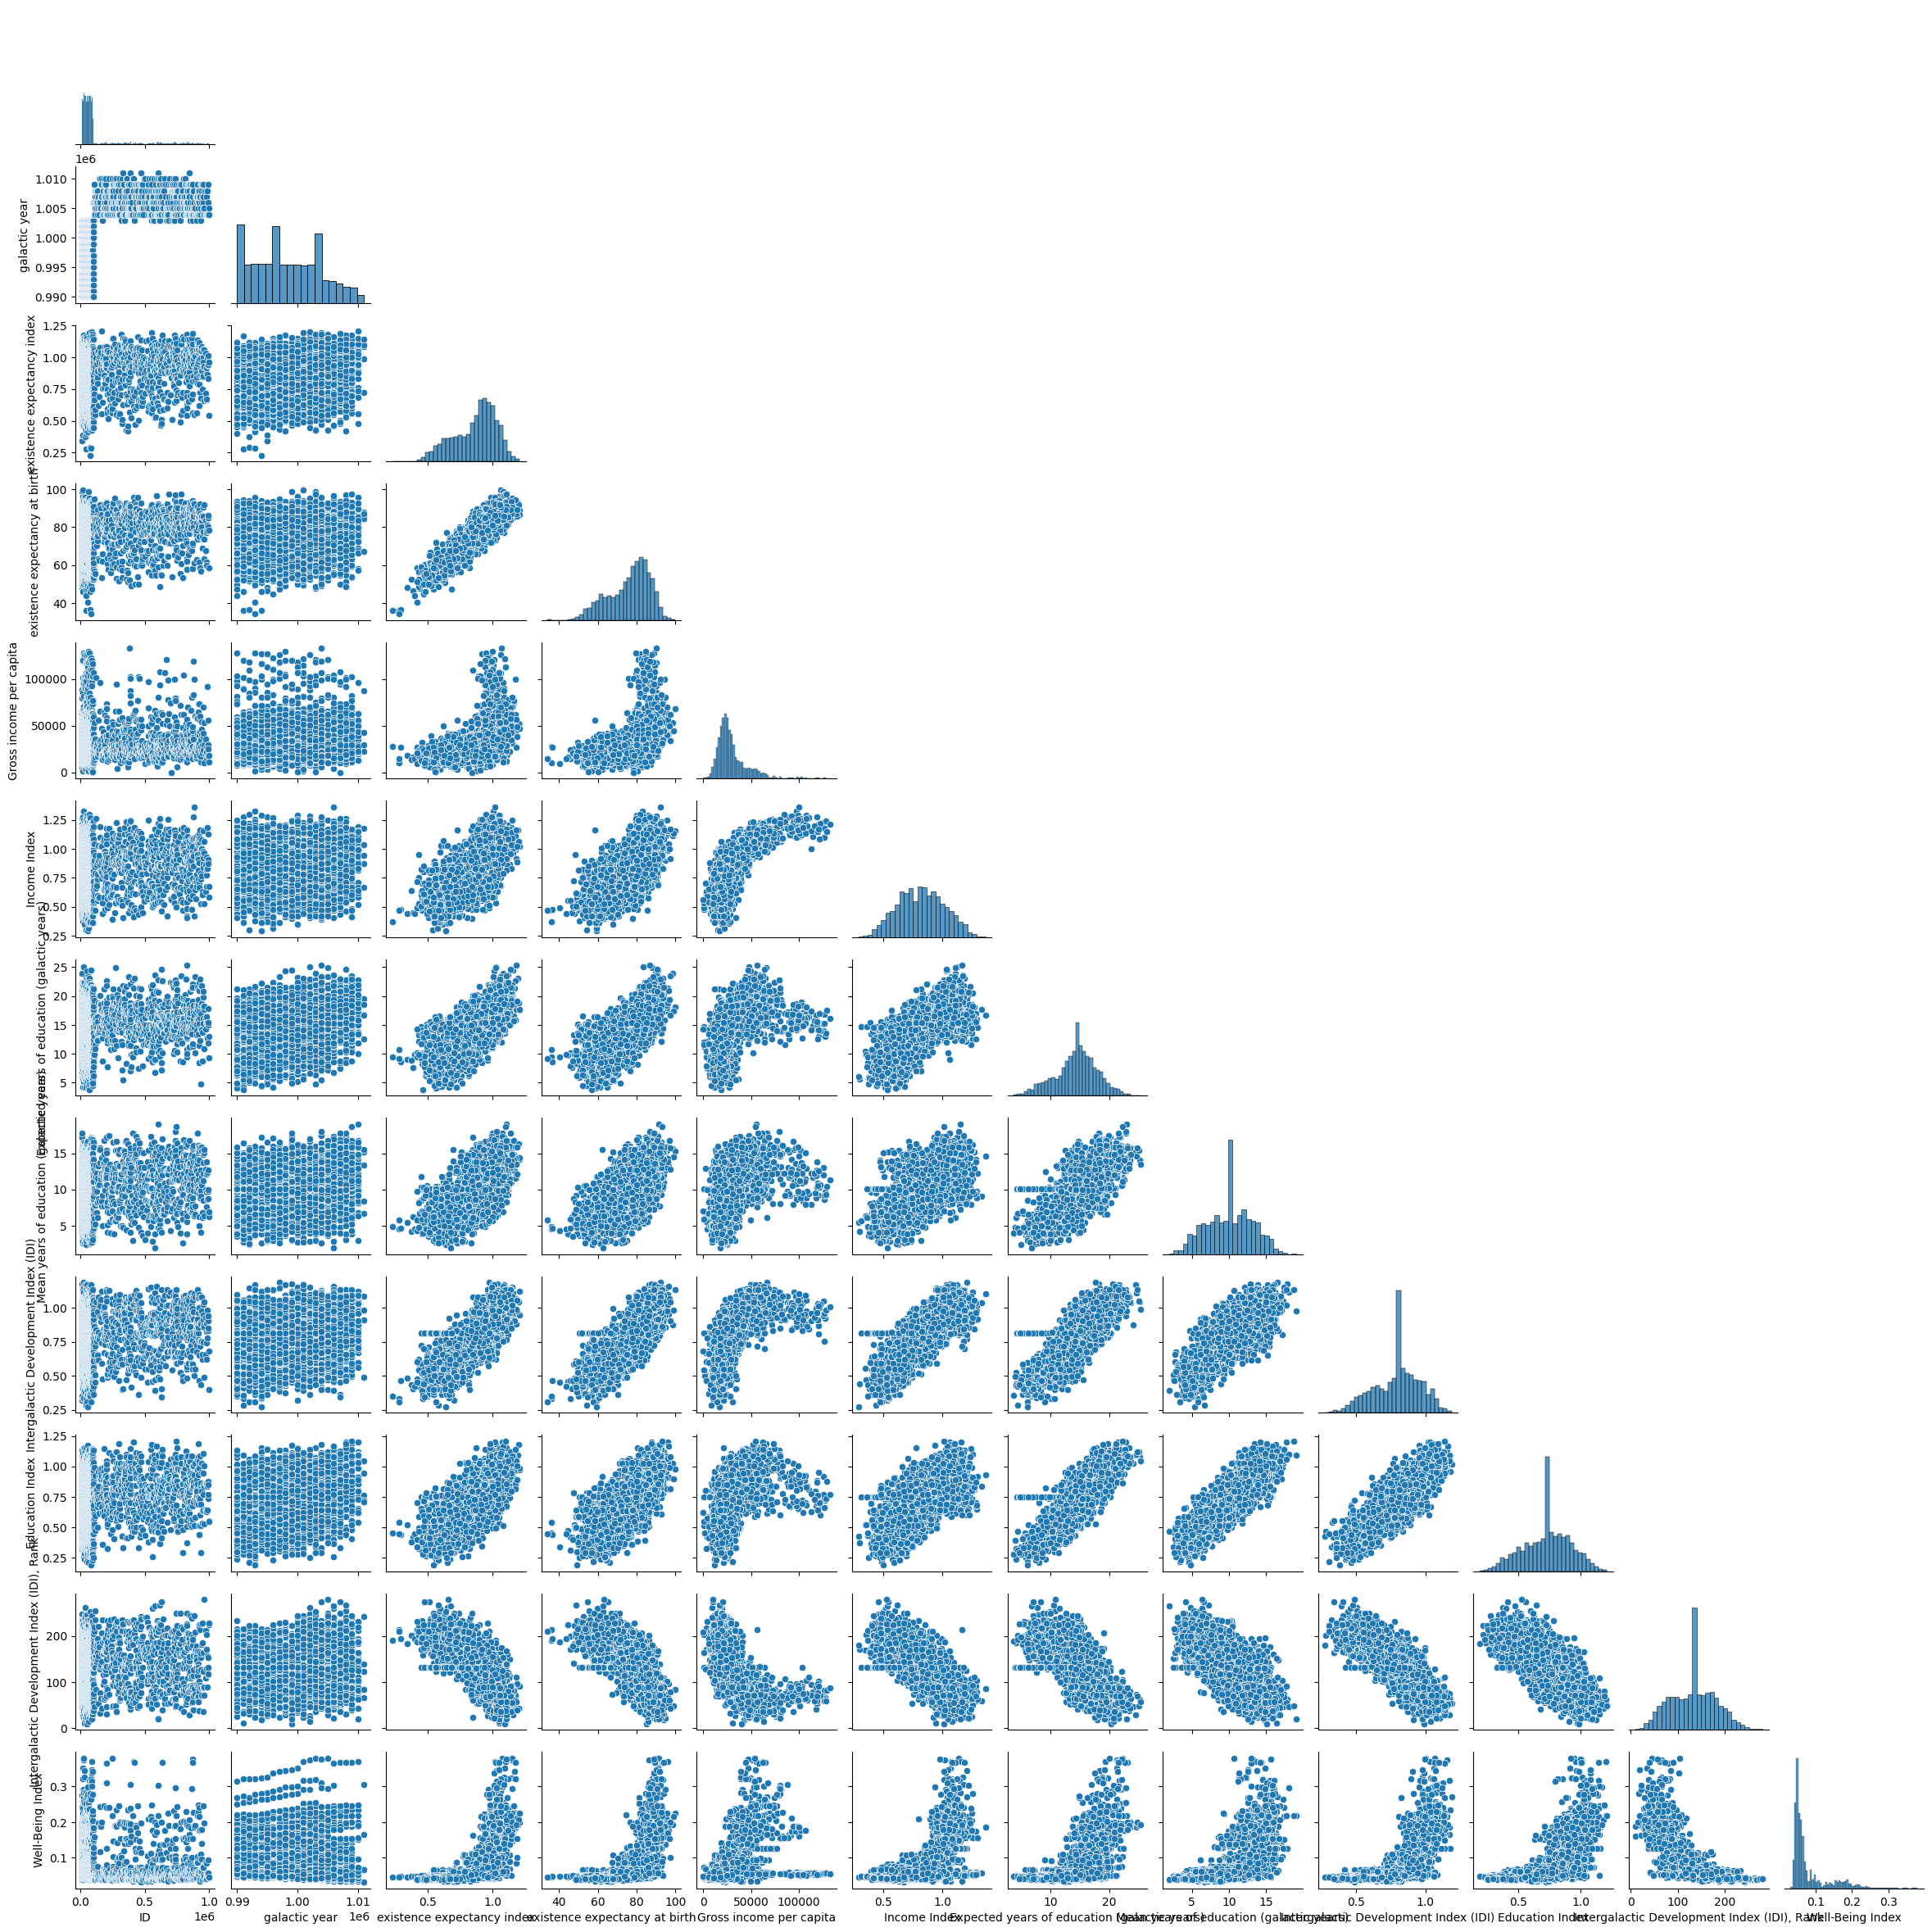

In [256]:
def plot_pairplot(df):
    """
    Plots a pairplot for a pandas DataFrame using the Seaborn library.
    
    Arguments:
    data -- pandas DataFrame
    
    Returns:
    None
    """
    # Create a pairplot using the Seaborn library
    sns.pairplot(df, size=2, corner=True)
    
    # Display the plot
    plt.show()

plot_pairplot(clean_df)

Finally on relationships, a pair plot can be used to visualise the relationships between all the numerical features at the same time.
We can deduce that there is a multicolinearity between the predictor variables. We will have to use some regularization techniques eg Lasso o reduce the impact of correlated variables. 

#### More descriptive statistics on the variables

In [257]:
# Subset for galaxies `Andromeda V` and `Pictor II`
adr_pic = clean_df[(clean_df['galaxy']=='Andromeda V') | (clean_df['galaxy']=='Pictor II')]

# Group by galaxy, select target column, and compute mean and median
print(adr_pic.groupby('galaxy')['Well-Being Index'].agg([np.mean, np.median]))

                 mean    median
galaxy                         
Andromeda V  0.216877  0.216028
Pictor II    0.185698  0.184519


When we want to compare summary statistics between groups, it's much easier to use `.groupby()` and `.agg()` instead of subsetting and calling the same functions multiple times.

### 4. Feature Engineering
Here we will scale our data using `RobustScaler` since it is not sensitive to outliers

Unlike `StandardScaler` that scales the data based on the mean and standard deviation of the data, `RobustScaler` uses the `median` and `interquartile range (IQR)` to scale the data. The median is a measure of central tendency that is not influenced by outliers, while the IQR is a measure of dispersion that

In [258]:
def scale_dataframe_robust(df):
    """
    Scales the columns of a pandas DataFrame using the RobustScaler from the Scikit-learn library.
    
    Arguments:
    data -- pandas DataFrame
    
    Returns:
    scaled_data -- pandas DataFrame
    """
    # Create a RobustScaler object
    scaler = RobustScaler()
    
    # Fit and transform the data
    scaled_data = scaler.fit_transform(df)
    
    # Convert the scaled data to a DataFrame
    scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
    
    # Return the scaled data
    return scaled_data




In [259]:
# scale the train set
df  = clean_df.drop(['galaxy', 'Well-Being Index'], axis=1)
scaled_df = scale_dataframe_robust(df)
scaled_df

ID  galactic year  existence expectancy index   
0     -1.001166       0.444790                   -1.163725  \
1     -1.000783       0.111086                    0.300275   
2     -0.999843      -0.554765                    0.408124   
3     -0.999373      -0.333037                    0.445449   
4     -0.998799      -0.222062                    0.641189   
...         ...            ...                         ...   
3092  16.112957       0.890470                    0.161393   
3093  16.116038       0.667519                    0.184058   
3094  16.132961       0.667519                    0.485044   
3095  16.196490       0.667519                   -1.496070   
3096  16.200338       0.778939                    0.262297   

      existence expectancy at birth  Gross income per capita  Income Index   
0                         -1.464853                -0.517070     -1.258260  \
1                          0.161915                -0.900787     -0.221806   
2                          0.262526                 2.011831      0.733399   
3                         -0.188824                 0.547423     -0.393413   
4                          0.326964                -0.552516      0.452171   
...                             ...                      ...           ...   
3092                       0.398274                -0.066862      0.314454   
3093                       0.422489                 1.837881      1.067069   
3094                       0.506376                -0.541146      0.178145   
3095                      -1.313829                -0.903394     -0.815054   
3096                       0.004369                -0.491566     -0.517125   

      Expected years of education (galactic years)   
0                                        -1.588796  \
1                                         0.271548   
2                                         0.660550   
3                                        -0.260578   
4                                        -0.274494   
...                                            ...   
3092                                     -0.675802   
3093                                      0.161794   
3094                                      0.730325   
3095                                     -0.407909   
3096                                     -1.256475   

      Mean years of education (galactic years)   
0                                    -1.104747  \
1                                     0.657699   
2                                     0.284564   
3                                     0.000000   
4                                     0.362809   
...                                        ...   
3092                                 -0.077374   
3093                                 -0.024873   
3094                                 -0.301810   
3095                                 -0.869932   
3096                                 -0.724406   

      Intergalactic Development Index (IDI)  Education Index   
0                                 -1.349847        -1.117293  \
1                                 -0.027648         0.361582   
2                                  0.707551         0.574981   
3                                  0.000000         0.000000   
4                                  0.671218         0.201805   
...                                     ...              ...   
3092                               0.153212         0.413038   
3093                               0.410741        -0.036170   
3094                               0.571585         0.081827   
3095                              -1.827673        -0.792006   
3096                              -0.585385        -0.807022   

      Intergalactic Development Index (IDI), Rank  
0                                        1.694677  
1                                        0.075082  
2                                       -0.847323  
3                                        0.000000  
4                                        0.132726  


In [260]:
#scale the test set
df_test  = clean_df_test.drop('galaxy', axis=1)
scaled_df_test = scale_dataframe_robust(df_test)
scaled_df_test

ID  galactic year  existence expectancy index   
0    0.714251      -0.999005                   -0.658621  \
1    0.306470      -0.856533                   -0.390789   
2   -0.088488      -0.713920                   -0.626496   
3   -0.326362       0.572444                   -0.499844   
4   -0.238281      -0.999005                   -0.920656   
..        ...            ...                         ...   
715 -0.304489       0.572444                    0.328031   
716 -1.068196      -1.141476                   -1.496506   
717  0.093680      -0.999005                   -1.613965   
718  0.585868      -0.856533                   -1.754152   
719  0.684716      -0.713920                   -1.562549   

     existence expectancy at birth  Gross income per capita  Income Index   
0                         0.080340                -0.644750     -0.616235  \
1                        -0.592231                -0.218504     -0.691707   
2                        -0.981189                -0.720072     -0.358876   
3                        -0.959911                -0.441795     -0.389625   
4                        -0.710506                 0.064641     -0.789323   
..                             ...                      ...           ...   
715                       0.809525                 1.832621      1.203527   
716                      -1.702006                -0.132273     -1.026579   
717                      -1.737037                -1.013657     -0.829505   
718                      -2.100618                -0.319294     -0.836887   
719                      -1.703530                -0.271598     -0.849102   

     Expected years of education (galactic years)   
0                                        0.012670  \
1                                       -0.721943   
2                                       -0.408036   
3                                       -0.397826   
4                                       -0.801224   
..                                            ...   
715                                      0.452876   
716                                     -1.558460   
717                                     -1.868021   
718                                     -1.458165   
719                                     -1.253980   

     Mean years of education (galactic years)   
0                                   -0.009334  \
1                                   -0.157170   
2                                   -0.256713   
3                                   -0.187792   
4                                   -0.786987   
..                                        ...   
715                                  0.386876   
716                                 -1.410248   
717                                 -1.328428   
718                                 -0.813260   
719                                 -1.098206   

     Intergalactic Development Index (IDI)  Education Index   
0                                -0.614803        -0.204210  \
1                                -0.565052         0.007347   
2                                -0.445853         0.166164   
3                                -0.437122        -0.012908   
4                                -0.787022        -0.955166   
..                                     ...              ...   
715                               0.631252         0.229125   
716                              -1.392663        -1.515425   
717                              -1.025588        -1.389538   
718                              -1.641222        -1.390638   
719                              -1.304377        -1.047119   

     Intergalactic Development Index (IDI), Rank  
0                                       0.444033  
1                                       0.246267  
2                                       0.324928  
3                                       0.383119  
4                                       0.060882  
..                                           ...  
715                      

Split the data into prediator variables `X` and target variable `y`

In [261]:
#split the data
X = scaled_df.values
y = clean_df["Well-Being Index"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [262]:
X_val = scaled_df_test.values
print(type(X_val))

<class 'numpy.ndarray'>


### 5. Variable Selection and Modeling

Not all features are relevant for training. Various techniques for feature selections are provided so here we will use Correlation Feature Selection.-a measure of how two variables change together.

The scikit-learn machine library provides an implementation of the correlation statistic in the `f_regression()` function. This function can be used as a feature selection strategy, such as selecting the top k most relevant features (largest values) via the `SelectKBest` class.


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 2477 rows
Test Set: 620 rows


Splitting our data in 80% for training we use 2477 rows and 620 for testing


In [264]:
from sklearn.feature_selection import SelectKBest, f_regression
# configure to select all features
best_features = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
best_features.fit(X_train, y_train)
# transform train input data
X_train_best_features = best_features.transform(X_train)
# transform test input data
X_test_best_features = best_features.transform(X_test)

We can then print the scores for each variable (*largest is better*) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

Feature 0: 2.092606
Feature 1: 0.866536
Feature 2: 1260.246184
Feature 3: 1288.541588
Feature 4: 764.617364
Feature 5: 1373.427306
Feature 6: 1383.215926
Feature 7: 1380.565476
Feature 8: 1695.786878
Feature 9: 1617.140144
Feature 10: 2198.199345


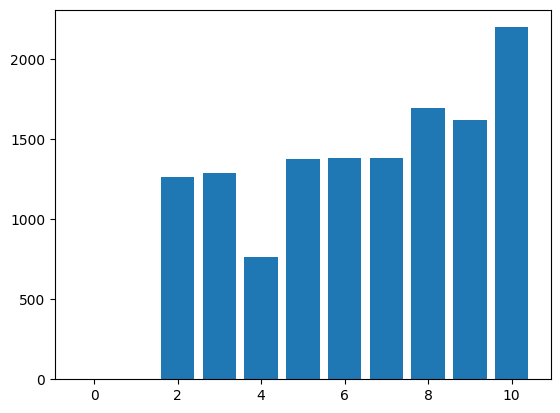

In [265]:
for i in range(len(best_features.scores_)):
    print('Feature %d: %f' % (i, best_features.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(best_features.scores_))], best_features.scores_)
plt.show()

Because the `f_regression` function indicates that about `9` features are dependable for our model 

In [266]:
#work with best features
best_features =['existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank']
#work with the best features
X = scaled_df[best_features]
print(X.columns)
X_val = scaled_df_test[best_features]
print(X_val.columns)


Index(['existence expectancy index', 'existence expectancy at birth',
       'Gross income per capita', 'Income Index',
       'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank'],
      dtype='object')
Index(['existence expectancy index', 'existence expectancy at birth',
       'Gross income per capita', 'Income Index',
       'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank'],
      dtype='object')


We are ready to train the model using the best features. We create a function that takes in a model, X, y then returns an rmse and a regresion plot to display how best it fits our points: We will call in different models

**NOTE:**
- 

In [267]:
def plot_actual_vs_predicted(model, X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the specified model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    mse_score = mse(y_test, y_pred)
    
    # Print the mean squared error and return the trained model
    print(f"Mean squared error: {mse_score:.4f}")
    print('RMSE:', np.sqrt(mse_score))
    r2 = r2_score(y_test, y_pred)
    print("R2:", r2)

    # Plot the actual vs predicted values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title('Actual vs Predicted Values')
    
    # Overlay the regression line
    z = np.polyfit(y_test, y_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), color='magenta')
    plt.show()


##### Models:
1. Linear Regression

Mean squared error: 0.0012
RMSE: 0.035245151207917796
R2: 0.5654340035073888


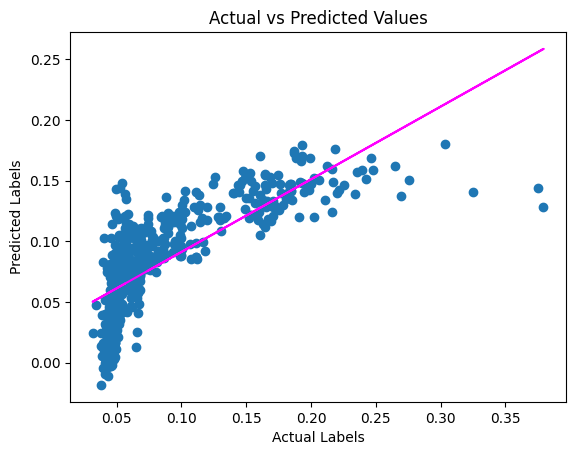

In [268]:
LR = plot_actual_vs_predicted(LinearRegression(),X,y)
LR

2. Decision Tree Regressor

Mean squared error: 0.0013
RMSE: 0.03550628544098663
R2: 0.5589706775822569


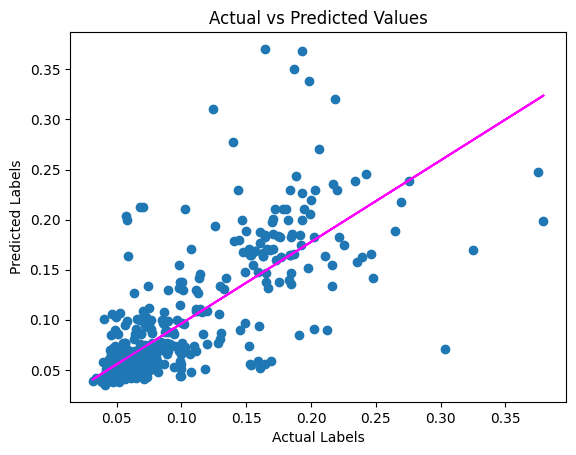

In [269]:
DTR = plot_actual_vs_predicted(DecisionTreeRegressor(), X,y)

Mean squared error: 0.0013
RMSE: 0.03547036906695357
R2: 0.559862472505033


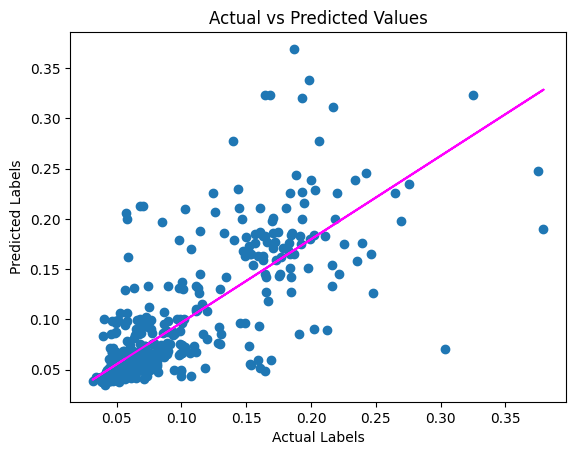

In [270]:
from sklearn.tree import DecisionTreeRegressor
plot_actual_vs_predicted(DecisionTreeRegressor(),X,y)

3. Gradient Boost Regressor

Mean squared error: 0.0006
RMSE: 0.025041430288969258
R2: 0.7806310045791877


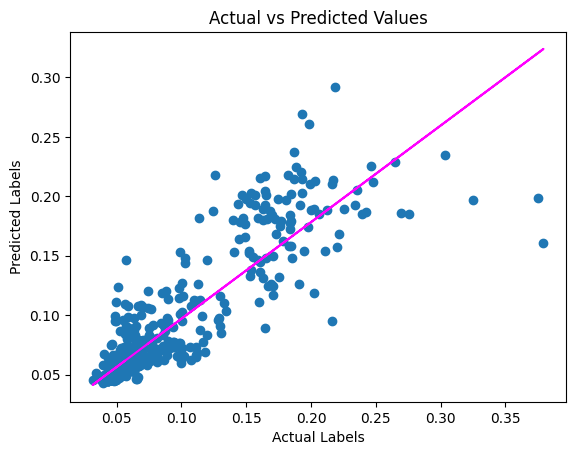

In [271]:
GBR = plot_actual_vs_predicted(GradientBoostingRegressor(), X,y)

4. Lasso

Mean squared error: 0.0029
RMSE: 0.053473941349220504
R2: -0.0003255823314189943


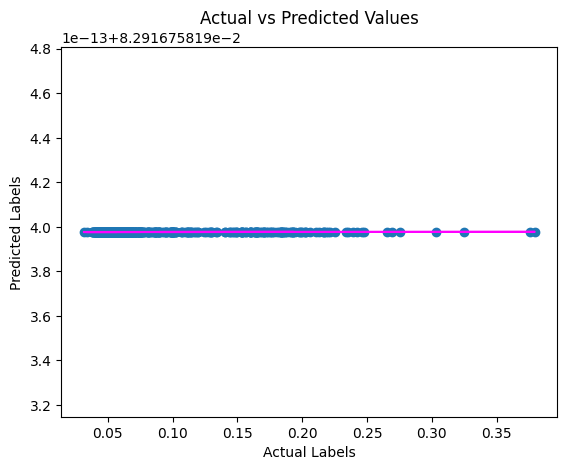

In [272]:
lasso = plot_actual_vs_predicted(Lasso(),X,y)

5. Random Forest Regressor

Mean squared error: 0.0006
RMSE: 0.02437192590891303
R2: 0.7922042392655816


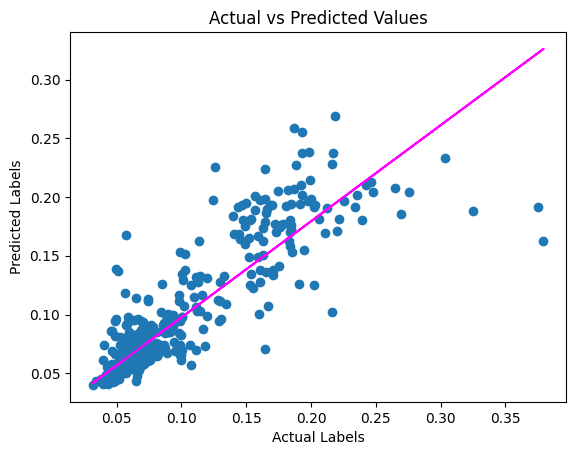

In [273]:
RF = plot_actual_vs_predicted(RandomForestRegressor(),X,y)

From the above model performances, we will create a dataframe for the metric scores of each model then plot a bar plot for te `RMSE`(we are interestd in it) to get a better understanding

In [274]:
# Example RMSE scores for three models
linear_reg = {'Mean squared error': 0.8253, 'RMSE': 0.9084, 'R2': 0.5654}
dt_reg = {'Mean squared error': 0.7258, 'RMSE': 0.8519 ,'R2': 0.6178}
rf_reg = {'Mean squared error': 0.3969, 'RMSE': 0.6299, 'R2': 0.7910}
lasso_reg = {'Mean squared error': 1.8998, 'RMSE': 1.3783, 'R2': -0.0003}
gb_reg = {'Mean squared error': 0.4163, 'RMSE': 0.6452, 'R2': 0.7807}


# create a dataframe
df = pd.DataFrame([linear_reg, dt_reg, rf_reg, lasso_reg, gb_reg], 
                  index=['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 
                         'Lasso Regression', 'Gradient Boosting Regression'])


df

Mean squared error    RMSE      R2
Linear Regression                         0.8253  0.9084  0.5654
Decision Tree Regression                  0.7258  0.8519  0.6178
Random Forest Regression                  0.3969  0.6299  0.7910
Lasso Regression                          1.8998  1.3783 -0.0003
Gradient Boosting Regression              0.4163  0.6452  0.7807

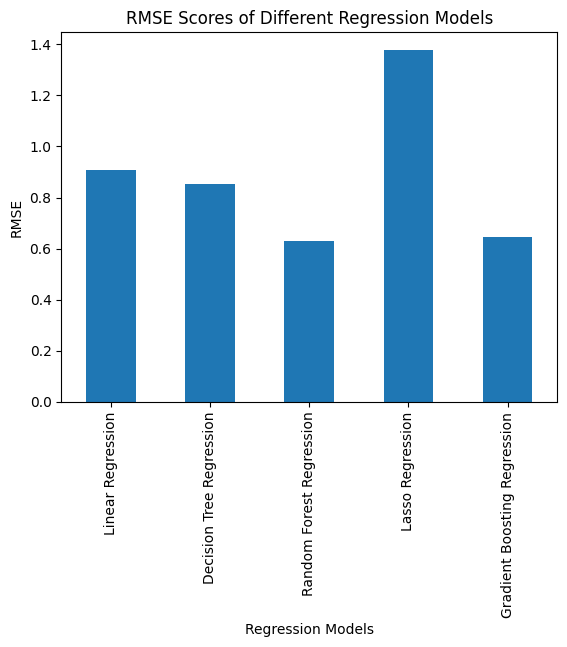

In [275]:
# Select the 'RMSE' column and plot as a bar plot
ax = df['RMSE'].plot(kind='bar')

# Set the title and axis labels
ax.set_title('RMSE Scores of Different Regression Models')
ax.set_xlabel('Regression Models')
ax.set_ylabel('RMSE')

# Show the plot
plt.show()

#### Model Performance Explanation
The bar plots represent the RMSE scores for different regression models, where *lower RMSE* scores indicate better performance of the model.

From the bar plots, we can see that the `Random Forest Regression` and `Gradient Boosting Regression` models have significantly *lower RMSE* scores compared to the other models. This suggests that these two models are more accurate in predicting the target variable.

On the other hand, the `Lasso Regression model` has the *highest RMSE score*, indicating that it is the least accurate among the models. The `Linear Regression` and `Decision Tree Regression` models have RMSE scores in between the other models, but closer to the `Lasso Regression` model than the `Random Forest` and `Gradient Boosting Regression` models.

### 6. Model Validation
We evaluate the performance of all models on the independent data set. This is done to ensure that the model is not overfitting or underfitting the data, and that it can generalize well to new, unseen data.

**K-fold cross-validation** involves dividing the data into k equal-sized subsets, where each subset is used once as a testing set and the remaining k-1 subsets are used as training sets. It is what we will be using.
The goal is to obtain an estimate of the models' performance on new, unseen data. This is typically done by calculating a metric such as mean squared error (MSE), root mean squared error (RMSE), or R-squared (R2) on the testing set. The performance of the model can then be compared to that of other models or to a baseline performance to determine whether it is acceptable for the given task. 

**NOTE:**
-  Validate for the highest model performing which is the `Random Forest`,`Gradient Boost` and `Decision Tree`

In [276]:
# evaluate GBT
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10)}
grad = GradientBoostingRegressor()
grad_cv = RandomizedSearchCV(grad, param_grid, cv=kf, n_iter=2)
grad_cv.fit(X_train, y_train)
print(grad_cv.best_params_, grad_cv.best_score_)

#evaluating on the test set
test_score = grad_cv.score(X_test, y_test)
print('GBR:', test_score)


{'alpha': 0.0001} 0.7790114802801211
GBR: 0.7789183814747176


In [277]:
# evaluate RF
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'ccp_alpha': np.arange(0.0001, 1, 10)}
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(rf, param_grid, cv=kf, n_iter=2)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_, rf_cv.best_score_)

#evaluating on the test set
test_score = rf_cv.score(X_test, y_test)
print('RF:', test_score)



{'ccp_alpha': 0.0001} 0.6612250573657489
RF: 0.688494305459775


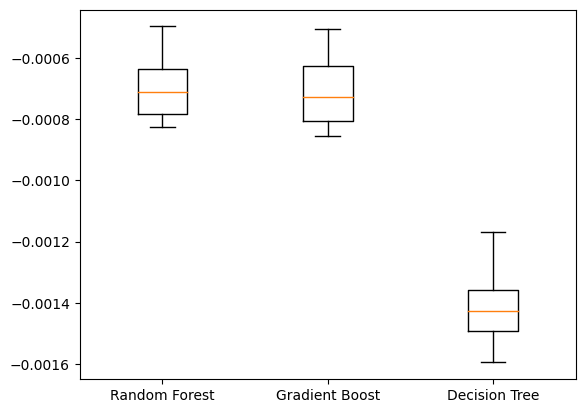

In [278]:
X = scaled_df.values
y = clean_df['Well-Being Index'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# evaluating regression models
models = {"Random Forest": RandomForestRegressor(), "Gradient Boost": GradientBoostingRegressor(), "Decision Tree": DecisionTreeRegressor()}
results = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')     
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()


In [279]:
for name, model in models.items():  
    model.fit(X_train, y_train)  
    test_score = model.score(X_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Random Forest Test Set Accuracy: 0.7963343610720307
Gradient Boost Test Set Accuracy: 0.7785666338902227
Decision Tree Test Set Accuracy: 0.5256540203143952


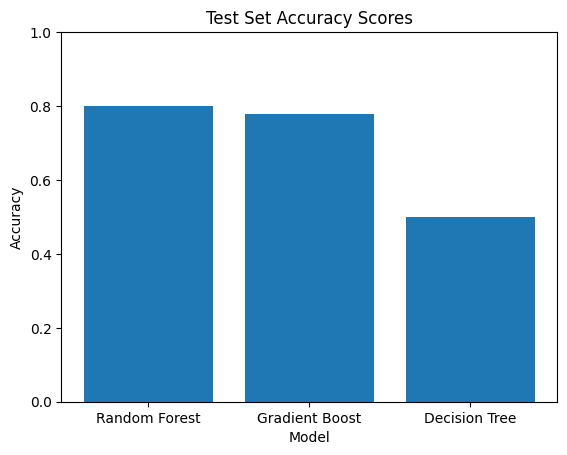

In [280]:
import matplotlib.pyplot as plt

# test set accuracy scores
test_acc = [0.7999745933052063, 0.7787353904198786, 0.49921297874231807]

# model names
models = ['Random Forest', 'Gradient Boost', 'Decision Tree']

# plot the bar plot
plt.bar(models, test_acc)

# set the y-axis limit
plt.ylim([0, 1])

# set the plot title and axes labels
plt.title('Test Set Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# show the plot
plt.show()


#### Model Validation Explanation
The height of each bar represents the accuracy score for that model. The plot shows that the `random regression` model has the highest accuracy score, followed by the `gradient boost` model, and then the `decision tree` model.
However, it's important to keep in mind that accuracy is not always the best metric to use, and it's important to consider other metrics as well depending on the specific problem being tackled. Additionally, it's important to consider factors such as interpretability, computational efficiency, and model complexity when selecting a model.

### 8. Saving The Best Model
After trying out a couple of models and and chosing the best model for our observation, we proceed to save the model using the pickle operation to serialize the machine learning algorithms and save the serialized format to a file.

Mean squared error: 0.0006
RMSE: 0.0243653531733766
R2: 0.7923163028275775


Text(0.5, 1.0, 'Actual vs Predicted Values')

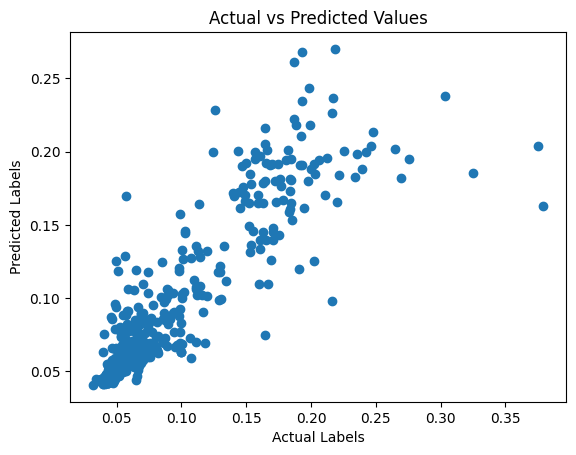

In [281]:
X = scaled_df[best_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()    
# Fit the specified model on the training data
model.fit(X_train, y_train)

    # Make predictions on the test data
y_pred = model.predict(X_test)

mse_score = mse(y_test, y_pred)
    
    # Print the mean squared error and return the trained model
print(f"Mean squared error: {mse_score:.4f}")
print('RMSE:', np.sqrt(mse_score))
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

    # Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Actual vs Predicted Values')

In [282]:
#saving the best performing models

model_rf_save_path = "rf.pkl"
with open(model_rf_save_path,'wb') as file:
    pickle.dump(model,file)

In [283]:
model_rf_load_path = "rf.pkl"
with open(model_rf_load_path,'rb') as file:
    unpickled_rf_model = pickle.load(file)

In [284]:
y_pred =  unpickled_rf_model.predict(X_val)

In [285]:
df_new = pd.DataFrame(y_pred, columns=['Well-Being Index'])
output_rf_df = pd.DataFrame({"ID": test_df['ID'].reset_index(drop=True)})
rf_model_file = output_rf_df.join(df_new)
rf_model_file['Well-Being Index'] = df_new.values
rf_model_file.to_csv("rf_model_file.csv", index=False)

In [286]:
print(rf_model_file)

         ID  Well-Being Index
0    886447          0.059456
1    687564          0.053045
2    494935          0.050907
3    378919          0.050190
4    421878          0.051724
..      ...               ...
715  389587          0.146664
716   17112          0.047294
717  583782          0.046835
718  823832          0.049057
719  872042          0.047005

[720 rows x 2 columns]
